In [114]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import adjusted_rand_score

In [115]:
print(sklearn.__version__)
print(matplotlib.__version__)
print(sns.__version__)

1.5.2
3.9.2
0.13.2


In [118]:
from src.utils.helpers import set_seed

In [119]:
# set random seeds
seed = 1
set_seed(seed)

In [ ]:
os.chdir("/path/to...")

## PiB DGD model, correct test function (looping by sample for best init reps)

In [50]:
# df with train and val rep from dgd merged
dgd_df = pd.read_csv("Second_PiB_dgd_df.tsv", sep='\t')
dgd_df

,Donor_ID,L1,L2,L3,L4,L5,L6,L7,L8,L9,...,L12,L13,L14,L15,L16,L17,L18,L19,L20,Tumor_Type
0,DO1001,-0.015616,0.100202,0.032424,0.003987,-0.089712,0.023092,-0.083869,0.057348,-0.024654,...,0.024221,-0.027243,-0.134412,-0.020104,0.156851,-0.169411,-0.040825,-0.109769,-0.073983,Breast-AdenoCa
1,DO1002,0.011012,0.087017,0.005213,-0.002583,-0.093005,0.035640,-0.080369,0.069323,-0.039215,...,0.049143,0.003819,-0.118260,-0.015884,0.147710,-0.157616,-0.041862,-0.108102,-0.086464,Breast-AdenoCa
2,DO1003,-0.014999,0.089656,0.029476,0.010445,-0.082810,0.040793,-0.074698,0.063257,-0.020311,...,0.064749,-0.014062,-0.123618,-0.037806,0.131569,-0.142141,-0.053784,-0.104419,-0.070392,Breast-AdenoCa
3,DO1004,0.007199,0.097172,0.018730,0.006415,-0.077752,0.025911,-0.092423,0.048702,-0.010775,...,0.039192,-0.013627,-0.124317,-0.031860,0.144719,-0.156648,-0.050773,-0.104420,-0.098086,Breast-AdenoCa
4,DO1005,-0.005013,0.100831,0.020376,0.004702,-0.104078,0.043175,-0.088340,0.098629,-0.034210,...,0.033855,-0.012535,-0.134804,-0.021918,0.161740,-0.176006,-0.049545,-0.125237,-0.085091,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,DO9106,-0.001119,0.109972,0.055264,0.011569,-0.122292,-0.065232,-0.104163,0.043934,-0.025028,...,0.042738,0.050760,-0.137369,-0.069897,0.148073,-0.166013,-0.078704,-0.100455,-0.101255,ColoRect-AdenoCA
2114,DO9700,-0.037194,0.120351,0.065366,0.038465,-0.120678,-0.037925,-0.120933,0.007983,-0.017569,...,0.033516,-0.011193,-0.152685,-0.061889,0.158426,-0.173782,-0.072578,-0.109715,-0.118531,ColoRect-AdenoCA
2115,DO9732,-0.030256,0.109416,0.055780,0.019514,-0.110060,-0.033414,-0.099209,0.030388,-0.022865,...,0.043466,0.007955,-0.141091,-0.051117,0.149027,-0.162944,-0.070825,-0.106332,-0.091345,ColoRect-AdenoCA
2116,DO9788,-0.057081,0.106551,0.060877,0.032872,-0.116458,0.014384,-0.097787,0.043982,-0.054181,...,0.032310,0.049140,-0.139186,-0.051074,0.163747,-0.177800,-0.059409,-0.117035,-0.065365,ColoRect-AdenoCA


In [51]:
X_train = dgd_df.iloc[:, 1:-1]
y_train = dgd_df['Tumor_Type'] 

In [52]:
X_train

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19,L20
0,-0.015616,0.100202,0.032424,0.003987,-0.089712,0.023092,-0.083869,0.057348,-0.024654,0.113899,-0.098817,0.024221,-0.027243,-0.134412,-0.020104,0.156851,-0.169411,-0.040825,-0.109769,-0.073983
1,0.011012,0.087017,0.005213,-0.002583,-0.093005,0.035640,-0.080369,0.069323,-0.039215,0.115117,-0.099223,0.049143,0.003819,-0.118260,-0.015884,0.147710,-0.157616,-0.041862,-0.108102,-0.086464
2,-0.014999,0.089656,0.029476,0.010445,-0.082810,0.040793,-0.074698,0.063257,-0.020311,0.105610,-0.095686,0.064749,-0.014062,-0.123618,-0.037806,0.131569,-0.142141,-0.053784,-0.104419,-0.070392
3,0.007199,0.097172,0.018730,0.006415,-0.077752,0.025911,-0.092423,0.048702,-0.010775,0.118725,-0.080686,0.039192,-0.013627,-0.124317,-0.031860,0.144719,-0.156648,-0.050773,-0.104420,-0.098086
4,-0.005013,0.100831,0.020376,0.004702,-0.104078,0.043175,-0.088340,0.098629,-0.034210,0.118877,-0.120274,0.033855,-0.012535,-0.134804,-0.021918,0.161740,-0.176006,-0.049545,-0.125237,-0.085091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,-0.001119,0.109972,0.055264,0.011569,-0.122292,-0.065232,-0.104163,0.043934,-0.025028,0.132662,-0.074293,0.042738,0.050760,-0.137369,-0.069897,0.148073,-0.166013,-0.078704,-0.100455,-0.101255
2114,-0.037194,0.120351,0.065366,0.038465,-0.120678,-0.037925,-0.120933,0.007983,-0.017569,0.137003,-0.041566,0.033516,-0.011193,-0.152685,-0.061889,0.158426,-0.173782,-0.072578,-0.109715,-0.118531
2115,-0.030256,0.109416,0.055780,0.019514,-0.110060,-0.033414,-0.099209,0.030388,-0.022865,0.125838,-0.067751,0.043466,0.007955,-0.141091,-0.051117,0.149027,-0.162944,-0.070825,-0.106332,-0.091345
2116,-0.057081,0.106551,0.060877,0.032872,-0.116458,0.014384,-0.097787,0.043982,-0.054181,0.110870,-0.072888,0.032310,0.049140,-0.139186,-0.051074,0.163747,-0.177800,-0.059409,-0.117035,-0.065365


In [53]:
# test rep df
dgd_test_df = pd.read_csv("Second_PiB_dgd_test_df.tsv", sep='\t')
dgd_test_df

,Donor_ID,L1,L2,L3,L4,L5,L6,L7,L8,L9,...,L12,L13,L14,L15,L16,L17,L18,L19,L20,Tumor_Type
0,DO51074,-0.013838,0.093069,0.021166,0.021296,-0.078245,-0.010285,-0.107692,0.044616,-0.037027,...,0.051588,0.014916,-0.128250,-0.057389,0.153127,-0.157456,-0.033478,-0.090286,-0.104018,Prost-AdenoCA
1,DO51496,-0.019240,0.093841,0.069889,0.053766,-0.090037,-0.077791,-0.072679,0.057439,-0.037833,...,0.104515,0.033426,-0.122898,-0.064621,0.111891,-0.119210,-0.114250,-0.092018,-0.112478,Panc-AdenoCA
2,DO15046,0.039849,0.091295,-0.006293,0.000343,-0.072743,0.015058,-0.080456,0.078507,-0.028534,...,0.033320,0.006062,-0.104377,-0.029149,0.158485,-0.177944,-0.055816,-0.111410,-0.096836,Head-SCC
3,DO6558,0.017059,0.103978,0.011385,0.009828,-0.075071,-0.008252,-0.118700,0.058395,-0.058049,...,0.070241,0.038246,-0.137488,-0.052383,0.159963,-0.169704,-0.063003,-0.110672,-0.113433,Lymph-CLL
4,DO50410,-0.089074,0.101532,0.115593,0.022823,-0.091547,-0.068581,-0.114145,-0.096488,-0.051470,...,0.126399,0.018310,-0.277845,-0.082309,0.161371,-0.177601,-0.097735,-0.089164,-0.122386,Eso-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,DO46400,-0.019506,0.093131,0.023973,-0.003382,-0.099245,0.038810,-0.092915,0.061651,-0.030316,...,0.058067,0.000016,-0.140121,-0.034654,0.152379,-0.158509,-0.060443,-0.118114,-0.095693,Ovary-AdenoCA
370,DO51514,-0.001969,0.107460,0.041399,0.063867,-0.069346,-0.028917,-0.110061,0.063863,-0.040082,...,0.012763,0.039574,-0.118685,-0.062995,0.136561,-0.151046,-0.070171,-0.087314,-0.087934,Panc-AdenoCA
371,DO51144,-0.025039,0.106440,0.041077,0.024390,-0.088767,-0.014511,-0.102345,0.059666,-0.048731,...,0.055149,0.019271,-0.137891,-0.060363,0.155629,-0.166244,-0.050995,-0.107955,-0.091282,Prost-AdenoCA
372,DO23551,0.028837,0.119876,0.037267,-0.005674,-0.036805,0.017913,-0.111433,0.042245,-0.041149,...,0.067394,-0.007968,-0.153545,-0.084311,0.131354,-0.162196,-0.088115,-0.126452,-0.060443,Liver-HCC


In [54]:
X_test = dgd_test_df.iloc[:, 1:-1]
y_test = dgd_test_df['Tumor_Type'] 

In [55]:
X_test

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19,L20
0,-0.013838,0.093069,0.021166,0.021296,-0.078245,-0.010285,-0.107692,0.044616,-0.037027,0.120422,-0.075072,0.051588,0.014916,-0.128250,-0.057389,0.153127,-0.157456,-0.033478,-0.090286,-0.104018
1,-0.019240,0.093841,0.069889,0.053766,-0.090037,-0.077791,-0.072679,0.057439,-0.037833,0.123494,-0.043275,0.104515,0.033426,-0.122898,-0.064621,0.111891,-0.119210,-0.114250,-0.092018,-0.112478
2,0.039849,0.091295,-0.006293,0.000343,-0.072743,0.015058,-0.080456,0.078507,-0.028534,0.112229,-0.110835,0.033320,0.006062,-0.104377,-0.029149,0.158485,-0.177944,-0.055816,-0.111410,-0.096836
3,0.017059,0.103978,0.011385,0.009828,-0.075071,-0.008252,-0.118700,0.058395,-0.058049,0.136869,-0.083131,0.070241,0.038246,-0.137488,-0.052383,0.159963,-0.169704,-0.063003,-0.110672,-0.113433
4,-0.089074,0.101532,0.115593,0.022823,-0.091547,-0.068581,-0.114145,-0.096488,-0.051470,0.163129,0.065552,0.126399,0.018310,-0.277845,-0.082309,0.161371,-0.177601,-0.097735,-0.089164,-0.122386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,-0.019506,0.093131,0.023973,-0.003382,-0.099245,0.038810,-0.092915,0.061651,-0.030316,0.117641,-0.091350,0.058067,0.000016,-0.140121,-0.034654,0.152379,-0.158509,-0.060443,-0.118114,-0.095693
370,-0.001969,0.107460,0.041399,0.063867,-0.069346,-0.028917,-0.110061,0.063863,-0.040082,0.108436,-0.087567,0.012763,0.039574,-0.118685,-0.062995,0.136561,-0.151046,-0.070171,-0.087314,-0.087934
371,-0.025039,0.106440,0.041077,0.024390,-0.088767,-0.014511,-0.102345,0.059666,-0.048731,0.120619,-0.089094,0.055149,0.019271,-0.137891,-0.060363,0.155629,-0.166244,-0.050995,-0.107955,-0.091282
372,0.028837,0.119876,0.037267,-0.005674,-0.036805,0.017913,-0.111433,0.042245,-0.041149,0.126774,-0.082361,0.067394,-0.007968,-0.153545,-0.084311,0.131354,-0.162196,-0.088115,-0.126452,-0.060443


In [56]:
y_test

0      Prost-AdenoCA
1       Panc-AdenoCA
2           Head-SCC
3          Lymph-CLL
4        Eso-AdenoCa
           ...      
369    Ovary-AdenoCA
370     Panc-AdenoCA
371    Prost-AdenoCA
372        Liver-HCC
373    Ovary-AdenoCA
Name: Tumor_Type, Length: 374, dtype: object

In [57]:
# knn
knn = KNeighborsClassifier(n_neighbors=20) 
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [58]:
# the prediction accuracy
sum(predictions == y_test)/len(y_test)

0.6417112299465241

In [59]:
sklearn_adjusted_rand_score = adjusted_rand_score(predictions, y_test) # Calculate Adjusted Rand Score
sklearn_adjusted_rand_score

0.5208155948709345

In [60]:
labels = np.unique(y_test)
labels

array(['Biliary-AdenoCA', 'Bladder-TCC', 'Bone-Leiomyo', 'Bone-Osteosarc',
       'Breast-AdenoCa', 'CNS-GBM', 'CNS-Medullo', 'CNS-PiloAstro',
       'ColoRect-AdenoCA', 'Eso-AdenoCa', 'Head-SCC', 'Kidney-ChRCC',
       'Kidney-RCC', 'Liver-HCC', 'Lung-AdenoCA', 'Lung-SCC',
       'Lymph-BNHL', 'Lymph-CLL', 'Myeloid-MPN', 'Ovary-AdenoCA',
       'Panc-AdenoCA', 'Panc-Endocrine', 'Prost-AdenoCA', 'Skin-Melanoma',
       'Stomach-AdenoCA', 'Thy-AdenoCA', 'Uterus-AdenoCA'], dtype=object)

In [61]:
# heatmap of class accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test, predictions, labels=labels)

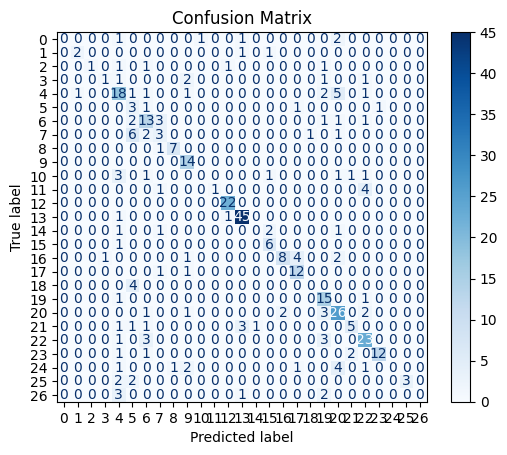

In [62]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

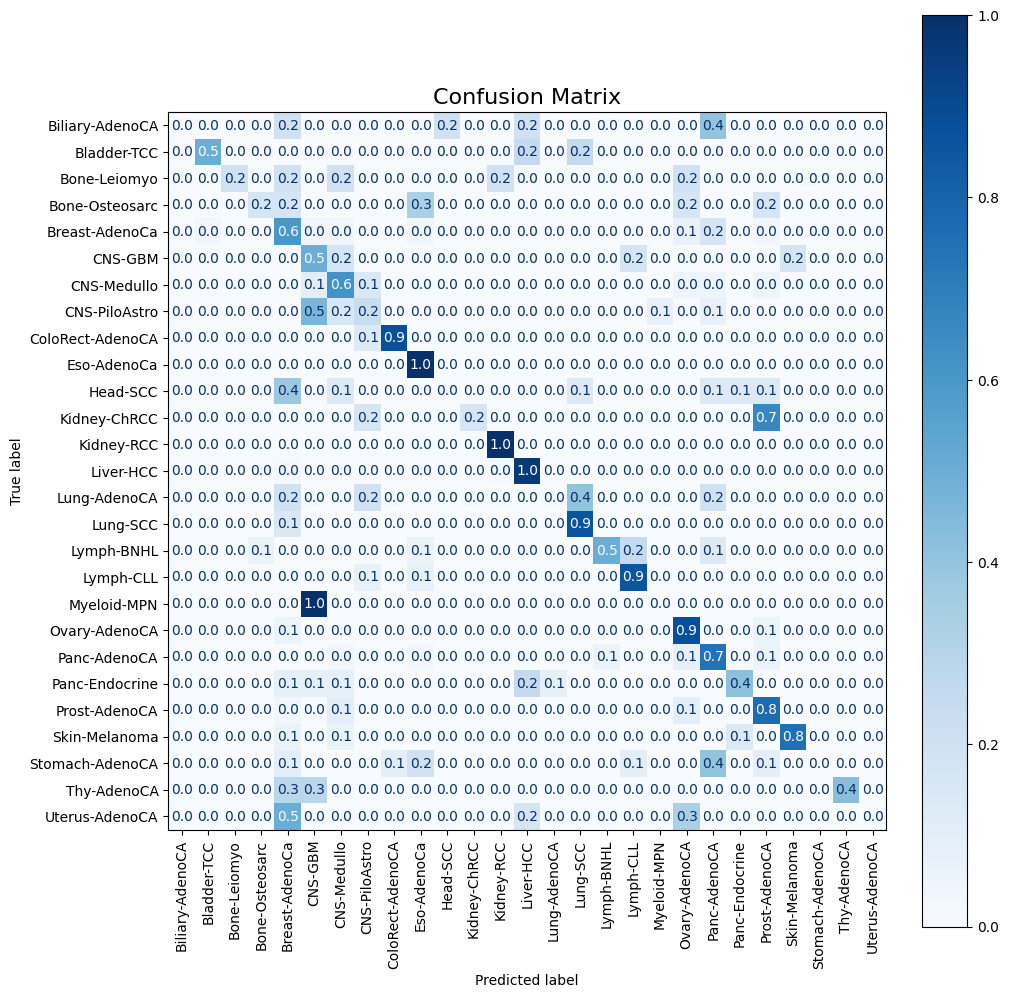

In [63]:
cm_test_normalized = cm_test.astype('float') / cm_test.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_normalized, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, values_format=".1f", xticks_rotation=90)

plt.title('Confusion Matrix', fontsize=16)

plt.savefig(f"PiB_CM.pdf", bbox_inches='tight')

plt.show()


## Factor DGD with onehot, 400 epochs

In [64]:
# df with train and val rep from dgd merged
dgd_df = pd.read_csv("onehot_mut_dgd_df.tsv", sep='\t')
dgd_df

,Donor_ID,L1,L2,L3,L4,L5,L6,L7,L8,L9,...,L12,L13,L14,L15,L16,L17,L18,L19,L20,Tumor_Type
0,DO1001,0.052964,0.052856,-0.052513,0.001658,0.025789,-0.025223,0.042435,-0.052677,-0.052124,...,-0.006033,0.030678,-0.027954,0.000428,-0.052564,-0.005617,0.022877,0.046248,-0.012523,Breast-AdenoCa
1,DO1002,0.052906,0.052906,-0.052485,-0.000664,0.025219,-0.024753,0.041211,-0.052846,-0.052749,...,-0.005785,0.031425,-0.025346,0.004197,-0.052918,-0.007264,0.022173,0.046215,-0.010614,Breast-AdenoCa
2,DO1003,0.052995,0.052916,-0.052604,0.001520,0.027143,-0.022881,0.041788,-0.052841,-0.052339,...,-0.003090,0.030568,-0.025911,-0.001030,-0.052766,-0.005193,0.022579,0.046141,-0.011932,Breast-AdenoCa
3,DO1004,0.052977,0.052936,-0.052488,0.001302,0.025712,-0.024315,0.041839,-0.052839,-0.052285,...,-0.006792,0.030727,-0.026150,-0.000723,-0.052632,-0.006392,0.024063,0.045604,-0.012720,Breast-AdenoCa
4,DO1005,0.052761,0.052792,-0.052487,0.003447,0.026165,-0.025470,0.041397,-0.052715,-0.052303,...,-0.005192,0.029810,-0.027914,0.002144,-0.052576,-0.006322,0.024995,0.046364,-0.013413,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,DO9106,0.047284,0.055722,-0.053978,-0.000937,0.027057,-0.017863,0.035899,-0.053994,-0.051361,...,-0.002795,0.024357,-0.019948,-0.000285,-0.055421,-0.008110,0.026916,0.047551,-0.009030,ColoRect-AdenoCA
2114,DO9700,0.053049,0.052859,-0.052699,0.001211,0.024407,-0.024076,0.041593,-0.052656,-0.053123,...,-0.000194,0.030579,-0.025699,0.000296,-0.053076,-0.009182,0.023884,0.046177,-0.010042,ColoRect-AdenoCA
2115,DO9732,0.053010,0.052848,-0.052723,-0.000289,0.025619,-0.023674,0.043481,-0.052705,-0.052364,...,-0.002646,0.031420,-0.027568,0.002116,-0.052540,-0.007388,0.021898,0.047335,-0.012487,ColoRect-AdenoCA
2116,DO9788,0.053057,0.052912,-0.052643,0.001593,0.026450,-0.024839,0.043588,-0.052750,-0.052630,...,-0.000407,0.030256,-0.026443,-0.000055,-0.052816,-0.006585,0.023527,0.047602,-0.011482,ColoRect-AdenoCA


In [65]:
X_train = dgd_df.iloc[:, 1:-1]
y_train = dgd_df['Tumor_Type'] 

In [66]:
X_train

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19,L20
0,0.052964,0.052856,-0.052513,0.001658,0.025789,-0.025223,0.042435,-0.052677,-0.052124,0.034489,-0.052622,-0.006033,0.030678,-0.027954,0.000428,-0.052564,-0.005617,0.022877,0.046248,-0.012523
1,0.052906,0.052906,-0.052485,-0.000664,0.025219,-0.024753,0.041211,-0.052846,-0.052749,0.033834,-0.052829,-0.005785,0.031425,-0.025346,0.004197,-0.052918,-0.007264,0.022173,0.046215,-0.010614
2,0.052995,0.052916,-0.052604,0.001520,0.027143,-0.022881,0.041788,-0.052841,-0.052339,0.034575,-0.052654,-0.003090,0.030568,-0.025911,-0.001030,-0.052766,-0.005193,0.022579,0.046141,-0.011932
3,0.052977,0.052936,-0.052488,0.001302,0.025712,-0.024315,0.041839,-0.052839,-0.052285,0.033851,-0.052718,-0.006792,0.030727,-0.026150,-0.000723,-0.052632,-0.006392,0.024063,0.045604,-0.012720
4,0.052761,0.052792,-0.052487,0.003447,0.026165,-0.025470,0.041397,-0.052715,-0.052303,0.035911,-0.052667,-0.005192,0.029810,-0.027914,0.002144,-0.052576,-0.006322,0.024995,0.046364,-0.013413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,0.047284,0.055722,-0.053978,-0.000937,0.027057,-0.017863,0.035899,-0.053994,-0.051361,0.028283,-0.047074,-0.002795,0.024357,-0.019948,-0.000285,-0.055421,-0.008110,0.026916,0.047551,-0.009030
2114,0.053049,0.052859,-0.052699,0.001211,0.024407,-0.024076,0.041593,-0.052656,-0.053123,0.034476,-0.052758,-0.000194,0.030579,-0.025699,0.000296,-0.053076,-0.009182,0.023884,0.046177,-0.010042
2115,0.053010,0.052848,-0.052723,-0.000289,0.025619,-0.023674,0.043481,-0.052705,-0.052364,0.036617,-0.052661,-0.002646,0.031420,-0.027568,0.002116,-0.052540,-0.007388,0.021898,0.047335,-0.012487
2116,0.053057,0.052912,-0.052643,0.001593,0.026450,-0.024839,0.043588,-0.052750,-0.052630,0.036344,-0.052757,-0.000407,0.030256,-0.026443,-0.000055,-0.052816,-0.006585,0.023527,0.047602,-0.011482


In [67]:
y_train

0         Breast-AdenoCa
1         Breast-AdenoCa
2         Breast-AdenoCa
3         Breast-AdenoCa
4         Breast-AdenoCa
              ...       
2113    ColoRect-AdenoCA
2114    ColoRect-AdenoCA
2115    ColoRect-AdenoCA
2116    ColoRect-AdenoCA
2117    ColoRect-AdenoCA
Name: Tumor_Type, Length: 2118, dtype: object

In [68]:
# test rep df
dgd_test_df = pd.read_csv("onehot_mut_dgd_test_df.tsv", sep='\t')
dgd_test_df

,Donor_ID,L1,L2,L3,L4,L5,L6,L7,L8,L9,...,L12,L13,L14,L15,L16,L17,L18,L19,L20,Tumor_Type
0,DO51074,0.055144,0.049210,-0.052138,0.000950,0.025109,-0.023778,0.042472,-0.050734,-0.051228,...,-0.002354,0.034384,-0.028587,0.000792,-0.050930,-0.007513,0.020735,0.044674,-0.011301,Prost-AdenoCA
1,DO51496,0.050808,0.049300,-0.049330,0.003988,0.028753,-0.025893,0.042252,-0.049804,-0.053778,...,0.001477,0.032697,-0.027702,0.004227,-0.050203,-0.010114,0.020526,0.047578,-0.007530,Panc-AdenoCA
2,DO15046,0.050960,0.052383,-0.051593,0.001352,0.025665,-0.023013,0.040962,-0.052628,-0.051055,...,-0.002140,0.030625,-0.025939,0.002117,-0.049336,-0.010082,0.023705,0.046638,-0.005580,Head-SCC
3,DO6558,0.050553,0.055300,-0.051218,0.003148,0.027031,-0.023366,0.045819,-0.054117,-0.053249,...,-0.002926,0.031792,-0.027557,0.003676,-0.051251,-0.007062,0.021506,0.047189,-0.011077,Lymph-CLL
4,DO50410,0.049581,0.053542,-0.050006,-0.007157,0.025975,-0.022074,0.040065,-0.053877,-0.054329,...,0.000628,0.031166,-0.027534,-0.006240,-0.054503,-0.010339,0.023391,0.044273,-0.009774,Eso-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,DO46400,0.050986,0.049842,-0.050367,0.003393,0.026957,-0.022750,0.039242,-0.050491,-0.053904,...,-0.004184,0.033188,-0.028474,0.003440,-0.052674,-0.008131,0.021101,0.048462,-0.011713,Ovary-AdenoCA
370,DO51514,0.054804,0.048820,-0.050027,0.003044,0.030107,-0.024450,0.045687,-0.048626,-0.049329,...,-0.003519,0.030977,-0.026839,0.002952,-0.048594,-0.005478,0.021738,0.044315,-0.012484,Panc-AdenoCA
371,DO51144,0.052498,0.053079,-0.050294,-0.000897,0.026973,-0.020977,0.039420,-0.053830,-0.051009,...,0.000253,0.029239,-0.025510,-0.000859,-0.053789,-0.009615,0.025019,0.048206,-0.008885,Prost-AdenoCA
372,DO23551,0.046859,0.053593,-0.051099,-0.003257,0.025667,-0.026576,0.038246,-0.054143,-0.053869,...,-0.004142,0.029201,-0.025808,-0.003800,-0.054252,-0.006075,0.024402,0.044982,-0.011874,Liver-HCC


In [69]:
X_test = dgd_test_df.iloc[:, 1:-1]
y_test = dgd_test_df['Tumor_Type'] 

In [70]:
X_test

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19,L20
0,0.055144,0.049210,-0.052138,0.000950,0.025109,-0.023778,0.042472,-0.050734,-0.051228,0.035582,-0.051957,-0.002354,0.034384,-0.028587,0.000792,-0.050930,-0.007513,0.020735,0.044674,-0.011301
1,0.050808,0.049300,-0.049330,0.003988,0.028753,-0.025893,0.042252,-0.049804,-0.053778,0.035542,-0.051915,0.001477,0.032697,-0.027702,0.004227,-0.050203,-0.010114,0.020526,0.047578,-0.007530
2,0.050960,0.052383,-0.051593,0.001352,0.025665,-0.023013,0.040962,-0.052628,-0.051055,0.033113,-0.051942,-0.002140,0.030625,-0.025939,0.002117,-0.049336,-0.010082,0.023705,0.046638,-0.005580
3,0.050553,0.055300,-0.051218,0.003148,0.027031,-0.023366,0.045819,-0.054117,-0.053249,0.036166,-0.050321,-0.002926,0.031792,-0.027557,0.003676,-0.051251,-0.007062,0.021506,0.047189,-0.011077
4,0.049581,0.053542,-0.050006,-0.007157,0.025975,-0.022074,0.040065,-0.053877,-0.054329,0.033530,-0.051917,0.000628,0.031166,-0.027534,-0.006240,-0.054503,-0.010339,0.023391,0.044273,-0.009774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.050986,0.049842,-0.050367,0.003393,0.026957,-0.022750,0.039242,-0.050491,-0.053904,0.033471,-0.051395,-0.004184,0.033188,-0.028474,0.003440,-0.052674,-0.008131,0.021101,0.048462,-0.011713
370,0.054804,0.048820,-0.050027,0.003044,0.030107,-0.024450,0.045687,-0.048626,-0.049329,0.038075,-0.050521,-0.003519,0.030977,-0.026839,0.002952,-0.048594,-0.005478,0.021738,0.044315,-0.012484
371,0.052498,0.053079,-0.050294,-0.000897,0.026973,-0.020977,0.039420,-0.053830,-0.051009,0.032481,-0.054043,0.000253,0.029239,-0.025510,-0.000859,-0.053789,-0.009615,0.025019,0.048206,-0.008885
372,0.046859,0.053593,-0.051099,-0.003257,0.025667,-0.026576,0.038246,-0.054143,-0.053869,0.032817,-0.056597,-0.004142,0.029201,-0.025808,-0.003800,-0.054252,-0.006075,0.024402,0.044982,-0.011874


In [71]:
y_test

0      Prost-AdenoCA
1       Panc-AdenoCA
2           Head-SCC
3          Lymph-CLL
4        Eso-AdenoCa
           ...      
369    Ovary-AdenoCA
370     Panc-AdenoCA
371    Prost-AdenoCA
372        Liver-HCC
373    Ovary-AdenoCA
Name: Tumor_Type, Length: 374, dtype: object

In [72]:
# knn
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [73]:
# the prediction accuracy
sum(predictions == y_test)/len(y_test)

0.21657754010695188

In [74]:
sklearn_adjusted_rand_score = adjusted_rand_score(predictions, y_test) # Calculate Adjusted Rand Score
sklearn_adjusted_rand_score

0.1371317680296059

In [75]:
labels = np.unique(y_test)
labels

array(['Biliary-AdenoCA', 'Bladder-TCC', 'Bone-Leiomyo', 'Bone-Osteosarc',
       'Breast-AdenoCa', 'CNS-GBM', 'CNS-Medullo', 'CNS-PiloAstro',
       'ColoRect-AdenoCA', 'Eso-AdenoCa', 'Head-SCC', 'Kidney-ChRCC',
       'Kidney-RCC', 'Liver-HCC', 'Lung-AdenoCA', 'Lung-SCC',
       'Lymph-BNHL', 'Lymph-CLL', 'Myeloid-MPN', 'Ovary-AdenoCA',
       'Panc-AdenoCA', 'Panc-Endocrine', 'Prost-AdenoCA', 'Skin-Melanoma',
       'Stomach-AdenoCA', 'Thy-AdenoCA', 'Uterus-AdenoCA'], dtype=object)

In [76]:
# heatmap of class accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test, predictions, labels=labels)

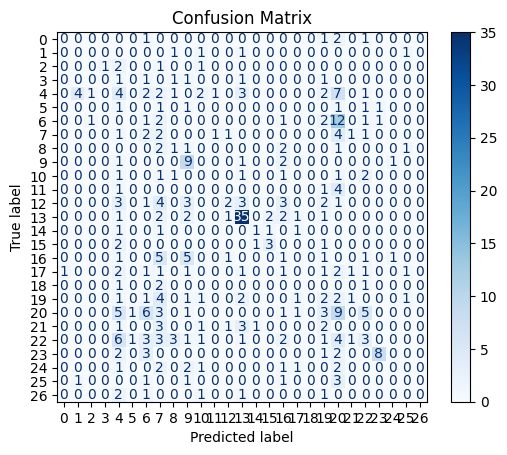

In [77]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

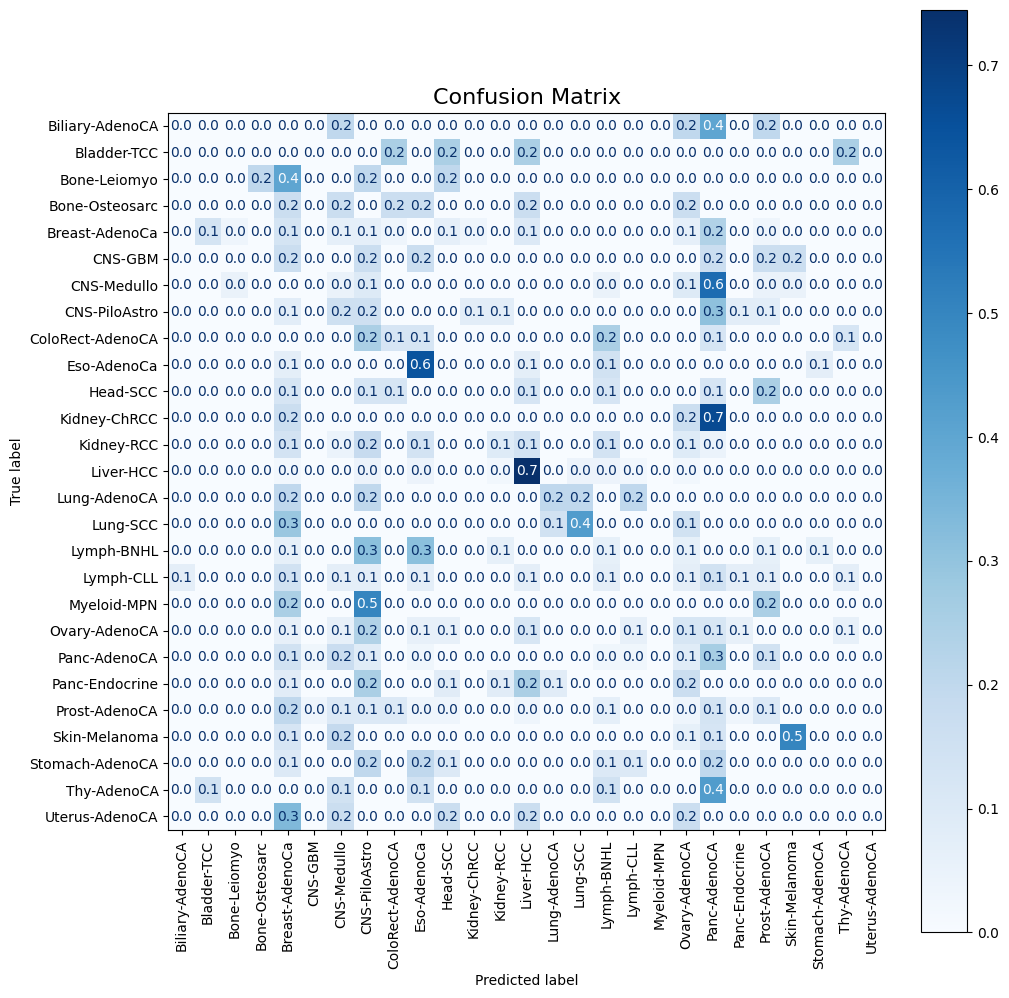

In [78]:
cm_test_normalized = cm_test.astype('float') / cm_test.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_normalized, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, values_format=".1f", xticks_rotation=90)

plt.title('Confusion Matrix', fontsize=16)

plt.savefig(f"FactorDGD_CM.pdf", bbox_inches='tight')

plt.show()

## Factor DGD without onehot, 400 epochs

In [79]:
# df with train and val rep from dgd merged
dgd_df = pd.read_csv("no_onehot_dgd_df.tsv", sep='\t')
dgd_df

,Donor_ID,L1,L2,L3,L4,L5,L6,L7,L8,L9,...,L12,L13,L14,L15,L16,L17,L18,L19,L20,Tumor_Type
0,DO1001,0.048639,-0.044147,0.056529,-0.058748,-0.016231,0.016857,0.054381,-0.066934,-0.045685,...,-0.061588,-0.043699,0.062095,-0.044627,-0.027907,-0.056471,0.057598,0.049597,-0.013307,Breast-AdenoCa
1,DO1002,0.046068,-0.050352,0.055005,-0.055394,-0.015410,-0.004400,0.054452,-0.055615,-0.053957,...,-0.055451,-0.045757,0.054950,-0.043472,-0.032235,-0.057312,0.055445,0.053243,-0.019927,Breast-AdenoCa
2,DO1003,0.047351,-0.050255,0.055375,-0.056735,-0.014247,-0.003325,0.054285,-0.054854,-0.052591,...,-0.055323,-0.044280,0.055354,-0.044640,-0.032861,-0.056740,0.056162,0.052754,-0.017041,Breast-AdenoCa
3,DO1004,0.047384,-0.050259,0.054574,-0.056389,-0.014684,0.001287,0.052846,-0.055030,-0.051827,...,-0.054551,-0.043705,0.054351,-0.044888,-0.031044,-0.057713,0.054919,0.052797,-0.018968,Breast-AdenoCa
4,DO1005,0.047069,-0.050612,0.054645,-0.056443,-0.012874,-0.003275,0.052907,-0.054863,-0.052517,...,-0.053348,-0.044485,0.054777,-0.044243,-0.030109,-0.056910,0.054866,0.051773,-0.019507,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,DO9106,0.046196,-0.049580,0.054129,-0.056259,-0.014131,0.000249,0.052724,-0.055830,-0.053642,...,-0.056425,-0.043771,0.055680,-0.045077,-0.033356,-0.055894,0.057938,0.053324,-0.022388,ColoRect-AdenoCA
2114,DO9700,0.045794,-0.048038,0.056223,-0.056001,-0.015541,-0.000620,0.053276,-0.054229,-0.052932,...,-0.055668,-0.044341,0.057662,-0.044489,-0.035431,-0.055011,0.057198,0.053199,-0.019903,ColoRect-AdenoCA
2115,DO9732,0.045234,-0.050434,0.056027,-0.058651,-0.015262,-0.000816,0.052616,-0.055276,-0.053466,...,-0.055338,-0.045153,0.056752,-0.044908,-0.034476,-0.054759,0.058476,0.054147,-0.020680,ColoRect-AdenoCA
2116,DO9788,0.046391,-0.050152,0.056165,-0.056812,-0.016668,0.003987,0.053300,-0.054078,-0.052910,...,-0.055664,-0.043763,0.056399,-0.044836,-0.032418,-0.056544,0.058558,0.053209,-0.021108,ColoRect-AdenoCA


In [80]:
X_train = dgd_df.iloc[:, 1:-1]
y_train = dgd_df['Tumor_Type'] 

In [81]:
X_train

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19,L20
0,0.048639,-0.044147,0.056529,-0.058748,-0.016231,0.016857,0.054381,-0.066934,-0.045685,0.048949,-0.019049,-0.061588,-0.043699,0.062095,-0.044627,-0.027907,-0.056471,0.057598,0.049597,-0.013307
1,0.046068,-0.050352,0.055005,-0.055394,-0.015410,-0.004400,0.054452,-0.055615,-0.053957,0.013081,0.006508,-0.055451,-0.045757,0.054950,-0.043472,-0.032235,-0.057312,0.055445,0.053243,-0.019927
2,0.047351,-0.050255,0.055375,-0.056735,-0.014247,-0.003325,0.054285,-0.054854,-0.052591,0.013540,0.006607,-0.055323,-0.044280,0.055354,-0.044640,-0.032861,-0.056740,0.056162,0.052754,-0.017041
3,0.047384,-0.050259,0.054574,-0.056389,-0.014684,0.001287,0.052846,-0.055030,-0.051827,0.016950,0.001857,-0.054551,-0.043705,0.054351,-0.044888,-0.031044,-0.057713,0.054919,0.052797,-0.018968
4,0.047069,-0.050612,0.054645,-0.056443,-0.012874,-0.003275,0.052907,-0.054863,-0.052517,0.015379,-0.001220,-0.053348,-0.044485,0.054777,-0.044243,-0.030109,-0.056910,0.054866,0.051773,-0.019507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,0.046196,-0.049580,0.054129,-0.056259,-0.014131,0.000249,0.052724,-0.055830,-0.053642,0.007670,0.004026,-0.056425,-0.043771,0.055680,-0.045077,-0.033356,-0.055894,0.057938,0.053324,-0.022388
2114,0.045794,-0.048038,0.056223,-0.056001,-0.015541,-0.000620,0.053276,-0.054229,-0.052932,0.009579,0.005510,-0.055668,-0.044341,0.057662,-0.044489,-0.035431,-0.055011,0.057198,0.053199,-0.019903
2115,0.045234,-0.050434,0.056027,-0.058651,-0.015262,-0.000816,0.052616,-0.055276,-0.053466,0.010200,0.005773,-0.055338,-0.045153,0.056752,-0.044908,-0.034476,-0.054759,0.058476,0.054147,-0.020680
2116,0.046391,-0.050152,0.056165,-0.056812,-0.016668,0.003987,0.053300,-0.054078,-0.052910,0.011453,0.002605,-0.055664,-0.043763,0.056399,-0.044836,-0.032418,-0.056544,0.058558,0.053209,-0.021108


In [82]:
y_train

0         Breast-AdenoCa
1         Breast-AdenoCa
2         Breast-AdenoCa
3         Breast-AdenoCa
4         Breast-AdenoCa
              ...       
2113    ColoRect-AdenoCA
2114    ColoRect-AdenoCA
2115    ColoRect-AdenoCA
2116    ColoRect-AdenoCA
2117    ColoRect-AdenoCA
Name: Tumor_Type, Length: 2118, dtype: object

In [83]:
# test rep df
dgd_test_df = pd.read_csv("no_onehot_mut_dgd_test_df.tsv", sep='\t')
dgd_test_df

,Donor_ID,L1,L2,L3,L4,L5,L6,L7,L8,L9,...,L12,L13,L14,L15,L16,L17,L18,L19,L20,Tumor_Type
0,DO51074,0.046928,-0.049861,0.056288,-0.058933,-0.012980,0.003270,0.055216,-0.057585,-0.054548,...,-0.055492,-0.044649,0.055417,-0.047232,-0.032771,-0.056715,0.052938,0.054456,-0.021034,Prost-AdenoCA
1,DO51496,0.047155,-0.053986,0.057305,-0.056618,-0.013986,0.008515,0.055483,-0.056548,-0.056604,...,-0.058685,-0.047594,0.055193,-0.048633,-0.035240,-0.056887,0.059233,0.055328,-0.020308,Panc-AdenoCA
2,DO15046,0.040945,-0.047320,0.047336,-0.056734,-0.017199,-0.005016,0.049624,-0.051410,-0.046466,...,-0.049449,-0.034108,0.057715,-0.041348,-0.023495,-0.056718,0.048418,0.046808,-0.027772,Head-SCC
3,DO6558,0.048515,-0.048848,0.055437,-0.054732,-0.008648,0.004555,0.051364,-0.055357,-0.056917,...,-0.057391,-0.040958,0.054537,-0.047033,-0.032948,-0.057130,0.055160,0.055030,-0.019610,Lymph-CLL
4,DO50410,0.047972,-0.056141,0.052736,-0.053095,-0.015652,0.007097,0.054221,-0.054932,-0.051533,...,-0.049826,-0.041799,0.050607,-0.041015,-0.027943,-0.051411,0.058161,0.049637,-0.024180,Eso-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,DO46400,0.050848,-0.057798,0.060530,-0.059281,-0.015954,-0.002417,0.051569,-0.053942,-0.046516,...,-0.051672,-0.045765,0.043115,-0.043449,-0.028660,-0.057685,0.043182,0.052097,-0.029688,Ovary-AdenoCA
370,DO51514,0.045610,-0.046929,0.051524,-0.055507,-0.008613,0.005169,0.055498,-0.056704,-0.053348,...,-0.055698,-0.041035,0.050858,-0.039526,-0.034414,-0.057902,0.054245,0.053885,-0.022699,Panc-AdenoCA
371,DO51144,0.044524,-0.054082,0.055717,-0.056048,-0.012509,0.009161,0.052466,-0.054273,-0.053709,...,-0.054216,-0.042447,0.051312,-0.041670,-0.033047,-0.055797,0.053691,0.053664,-0.016731,Prost-AdenoCA
372,DO23551,0.050873,-0.053140,0.055837,-0.061318,-0.008952,-0.002006,0.057261,-0.060959,-0.054025,...,-0.057949,-0.048349,0.051255,-0.047271,-0.039343,-0.053112,0.049679,0.054517,-0.014934,Liver-HCC


In [84]:
X_test = dgd_test_df.iloc[:, 1:-1]
y_test = dgd_test_df['Tumor_Type'] 

In [85]:
X_test

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19,L20
0,0.046928,-0.049861,0.056288,-0.058933,-0.012980,0.003270,0.055216,-0.057585,-0.054548,0.014515,0.002765,-0.055492,-0.044649,0.055417,-0.047232,-0.032771,-0.056715,0.052938,0.054456,-0.021034
1,0.047155,-0.053986,0.057305,-0.056618,-0.013986,0.008515,0.055483,-0.056548,-0.056604,0.010952,-0.004077,-0.058685,-0.047594,0.055193,-0.048633,-0.035240,-0.056887,0.059233,0.055328,-0.020308
2,0.040945,-0.047320,0.047336,-0.056734,-0.017199,-0.005016,0.049624,-0.051410,-0.046466,0.026510,-0.010667,-0.049449,-0.034108,0.057715,-0.041348,-0.023495,-0.056718,0.048418,0.046808,-0.027772
3,0.048515,-0.048848,0.055437,-0.054732,-0.008648,0.004555,0.051364,-0.055357,-0.056917,0.014774,0.003403,-0.057391,-0.040958,0.054537,-0.047033,-0.032948,-0.057130,0.055160,0.055030,-0.019610
4,0.047972,-0.056141,0.052736,-0.053095,-0.015652,0.007097,0.054221,-0.054932,-0.051533,0.013411,0.009817,-0.049826,-0.041799,0.050607,-0.041015,-0.027943,-0.051411,0.058161,0.049637,-0.024180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.050848,-0.057798,0.060530,-0.059281,-0.015954,-0.002417,0.051569,-0.053942,-0.046516,0.020640,0.017561,-0.051672,-0.045765,0.043115,-0.043449,-0.028660,-0.057685,0.043182,0.052097,-0.029688
370,0.045610,-0.046929,0.051524,-0.055507,-0.008613,0.005169,0.055498,-0.056704,-0.053348,0.012002,0.003272,-0.055698,-0.041035,0.050858,-0.039526,-0.034414,-0.057902,0.054245,0.053885,-0.022699
371,0.044524,-0.054082,0.055717,-0.056048,-0.012509,0.009161,0.052466,-0.054273,-0.053709,0.009965,-0.011060,-0.054216,-0.042447,0.051312,-0.041670,-0.033047,-0.055797,0.053691,0.053664,-0.016731
372,0.050873,-0.053140,0.055837,-0.061318,-0.008952,-0.002006,0.057261,-0.060959,-0.054025,0.020942,0.011344,-0.057949,-0.048349,0.051255,-0.047271,-0.039343,-0.053112,0.049679,0.054517,-0.014934


In [86]:
y_test

0      Prost-AdenoCA
1       Panc-AdenoCA
2           Head-SCC
3          Lymph-CLL
4        Eso-AdenoCa
           ...      
369    Ovary-AdenoCA
370     Panc-AdenoCA
371    Prost-AdenoCA
372        Liver-HCC
373    Ovary-AdenoCA
Name: Tumor_Type, Length: 374, dtype: object

In [87]:
# knn
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [88]:
# the prediction accuracy
sum(predictions == y_test)/len(y_test)

0.29411764705882354

In [89]:
sklearn_adjusted_rand_score = adjusted_rand_score(predictions, y_test) # Calculate Adjusted Rand Score
sklearn_adjusted_rand_score

0.13901554648947828

In [90]:
# heatmap of class accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test, predictions)

In [91]:
labels = np.unique(y_test)
labels

array(['Biliary-AdenoCA', 'Bladder-TCC', 'Bone-Leiomyo', 'Bone-Osteosarc',
       'Breast-AdenoCa', 'CNS-GBM', 'CNS-Medullo', 'CNS-PiloAstro',
       'ColoRect-AdenoCA', 'Eso-AdenoCa', 'Head-SCC', 'Kidney-ChRCC',
       'Kidney-RCC', 'Liver-HCC', 'Lung-AdenoCA', 'Lung-SCC',
       'Lymph-BNHL', 'Lymph-CLL', 'Myeloid-MPN', 'Ovary-AdenoCA',
       'Panc-AdenoCA', 'Panc-Endocrine', 'Prost-AdenoCA', 'Skin-Melanoma',
       'Stomach-AdenoCA', 'Thy-AdenoCA', 'Uterus-AdenoCA'], dtype=object)

In [92]:
# heatmap of class accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test, predictions, labels=labels)

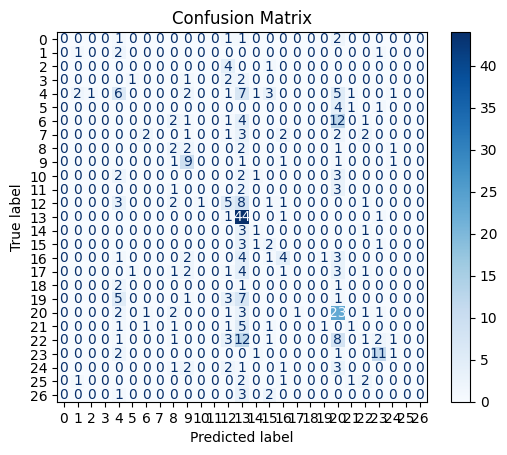

In [93]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

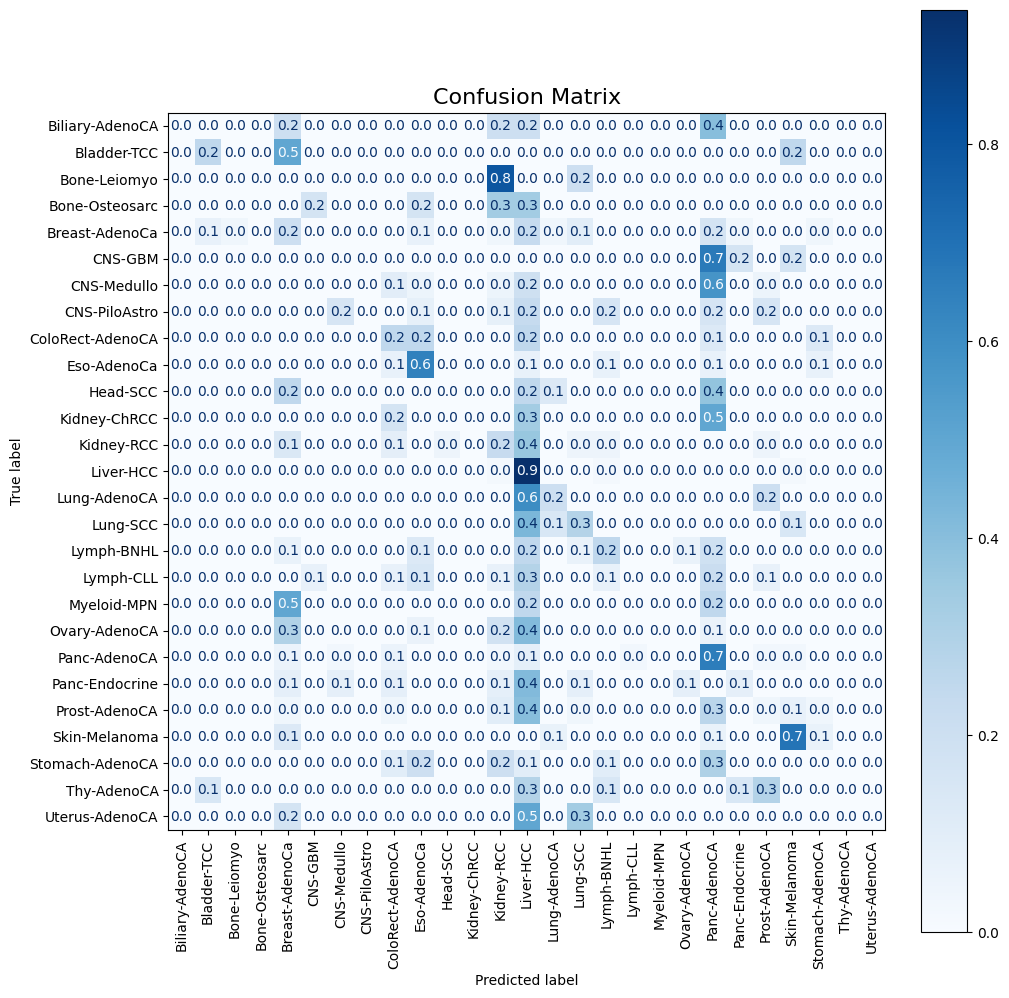

In [94]:
cm_test_normalized = cm_test.astype('float') / cm_test.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_normalized, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, values_format=".1f", xticks_rotation=90)

plt.title('Confusion Matrix', fontsize=16)

plt.savefig(f"no_onehot_FactorDGD_CM.pdf", bbox_inches='tight')

plt.show()

## Final model, with zero initialization for test reps

In [31]:
# df with train and val rep from dgd merged
dgd_df = pd.read_csv("first_mut_dgd_df.tsv", sep='\t')
dgd_df

,Donor_ID,L1,L2,L3,L4,L5,L6,L7,L8,L9,...,L12,L13,L14,L15,L16,L17,L18,L19,L20,Tumor_Type
0,DO1001,0.052964,0.052856,-0.052513,0.001658,0.025789,-0.025223,0.042435,-0.052677,-0.052124,...,-0.006033,0.030678,-0.027954,0.000428,-0.052564,-0.005617,0.022877,0.046248,-0.012523,Breast-AdenoCa
1,DO1002,0.052906,0.052906,-0.052485,-0.000664,0.025219,-0.024753,0.041211,-0.052846,-0.052749,...,-0.005785,0.031425,-0.025346,0.004197,-0.052918,-0.007264,0.022173,0.046215,-0.010614,Breast-AdenoCa
2,DO1003,0.052995,0.052916,-0.052604,0.001520,0.027143,-0.022881,0.041788,-0.052841,-0.052339,...,-0.003090,0.030568,-0.025911,-0.001030,-0.052766,-0.005193,0.022579,0.046141,-0.011932,Breast-AdenoCa
3,DO1004,0.052977,0.052936,-0.052488,0.001302,0.025712,-0.024315,0.041839,-0.052839,-0.052285,...,-0.006792,0.030727,-0.026150,-0.000723,-0.052632,-0.006392,0.024063,0.045604,-0.012720,Breast-AdenoCa
4,DO1005,0.052761,0.052792,-0.052487,0.003447,0.026165,-0.025470,0.041397,-0.052715,-0.052303,...,-0.005192,0.029810,-0.027914,0.002144,-0.052576,-0.006322,0.024995,0.046364,-0.013413,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,DO9106,0.047284,0.055722,-0.053978,-0.000937,0.027057,-0.017863,0.035899,-0.053994,-0.051361,...,-0.002795,0.024357,-0.019948,-0.000285,-0.055421,-0.008110,0.026916,0.047551,-0.009030,ColoRect-AdenoCA
2114,DO9700,0.053049,0.052859,-0.052699,0.001211,0.024407,-0.024076,0.041593,-0.052656,-0.053123,...,-0.000194,0.030579,-0.025699,0.000296,-0.053076,-0.009182,0.023884,0.046177,-0.010042,ColoRect-AdenoCA
2115,DO9732,0.053010,0.052848,-0.052723,-0.000289,0.025619,-0.023674,0.043481,-0.052705,-0.052364,...,-0.002646,0.031420,-0.027568,0.002116,-0.052540,-0.007388,0.021898,0.047335,-0.012487,ColoRect-AdenoCA
2116,DO9788,0.053057,0.052912,-0.052643,0.001593,0.026450,-0.024839,0.043588,-0.052750,-0.052630,...,-0.000407,0.030256,-0.026443,-0.000055,-0.052816,-0.006585,0.023527,0.047602,-0.011482,ColoRect-AdenoCA


In [32]:
X_train = dgd_df.iloc[:, 1:-1]
y_train = dgd_df['Tumor_Type'] 

In [33]:
X_train

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19,L20
0,0.052964,0.052856,-0.052513,0.001658,0.025789,-0.025223,0.042435,-0.052677,-0.052124,0.034489,-0.052622,-0.006033,0.030678,-0.027954,0.000428,-0.052564,-0.005617,0.022877,0.046248,-0.012523
1,0.052906,0.052906,-0.052485,-0.000664,0.025219,-0.024753,0.041211,-0.052846,-0.052749,0.033834,-0.052829,-0.005785,0.031425,-0.025346,0.004197,-0.052918,-0.007264,0.022173,0.046215,-0.010614
2,0.052995,0.052916,-0.052604,0.001520,0.027143,-0.022881,0.041788,-0.052841,-0.052339,0.034575,-0.052654,-0.003090,0.030568,-0.025911,-0.001030,-0.052766,-0.005193,0.022579,0.046141,-0.011932
3,0.052977,0.052936,-0.052488,0.001302,0.025712,-0.024315,0.041839,-0.052839,-0.052285,0.033851,-0.052718,-0.006792,0.030727,-0.026150,-0.000723,-0.052632,-0.006392,0.024063,0.045604,-0.012720
4,0.052761,0.052792,-0.052487,0.003447,0.026165,-0.025470,0.041397,-0.052715,-0.052303,0.035911,-0.052667,-0.005192,0.029810,-0.027914,0.002144,-0.052576,-0.006322,0.024995,0.046364,-0.013413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,0.047284,0.055722,-0.053978,-0.000937,0.027057,-0.017863,0.035899,-0.053994,-0.051361,0.028283,-0.047074,-0.002795,0.024357,-0.019948,-0.000285,-0.055421,-0.008110,0.026916,0.047551,-0.009030
2114,0.053049,0.052859,-0.052699,0.001211,0.024407,-0.024076,0.041593,-0.052656,-0.053123,0.034476,-0.052758,-0.000194,0.030579,-0.025699,0.000296,-0.053076,-0.009182,0.023884,0.046177,-0.010042
2115,0.053010,0.052848,-0.052723,-0.000289,0.025619,-0.023674,0.043481,-0.052705,-0.052364,0.036617,-0.052661,-0.002646,0.031420,-0.027568,0.002116,-0.052540,-0.007388,0.021898,0.047335,-0.012487
2116,0.053057,0.052912,-0.052643,0.001593,0.026450,-0.024839,0.043588,-0.052750,-0.052630,0.036344,-0.052757,-0.000407,0.030256,-0.026443,-0.000055,-0.052816,-0.006585,0.023527,0.047602,-0.011482


In [34]:
# test rep df
dgd_test_df = pd.read_csv("first_mut_dgd_test_df.tsv", sep='\t')
dgd_test_df

,Donor_ID,L1,L2,L3,L4,L5,L6,L7,L8,L9,...,L12,L13,L14,L15,L16,L17,L18,L19,L20,Tumor_Type
0,DO51074,0.051920,0.049280,-0.050686,0.001871,0.028786,-0.022874,0.043333,-0.054577,-0.049262,...,-0.003566,0.032137,-0.028548,0.001584,-0.049722,-0.005090,0.023735,0.044910,-0.012234,Prost-AdenoCA
1,DO51496,0.054149,0.054057,-0.052217,0.000565,0.028812,-0.025802,0.042121,-0.054013,-0.049003,...,-0.001280,0.031264,-0.028789,-0.001564,-0.048546,-0.007392,0.021475,0.049920,-0.009568,Panc-AdenoCA
2,DO15046,0.057820,0.054147,-0.055914,0.004538,0.029413,-0.025300,0.045625,-0.053709,-0.051654,...,-0.005962,0.027138,-0.028069,0.004576,-0.052340,-0.013104,0.027535,0.048381,-0.016124,Head-SCC
3,DO6558,0.050670,0.054327,-0.053020,-0.009648,0.025578,-0.024807,0.039532,-0.052490,-0.052172,...,0.010230,0.029839,-0.023879,-0.008912,-0.053485,-0.014477,0.021305,0.046601,-0.000378,Lymph-CLL
4,DO50410,0.053777,0.051458,-0.053757,-0.002982,0.026335,-0.020773,0.042660,-0.050088,-0.052070,...,-0.007057,0.027897,-0.022579,-0.004829,-0.052762,-0.010286,0.027710,0.042470,-0.021278,Eso-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,DO46400,0.048732,0.050048,-0.052483,-0.003082,0.025559,-0.023146,0.038385,-0.051720,-0.054663,...,-0.001154,0.034717,-0.023873,-0.003102,-0.050238,-0.008884,0.023484,0.047941,-0.008279,Ovary-AdenoCA
370,DO51514,0.050619,0.049813,-0.053111,-0.002144,0.024694,-0.026705,0.041508,-0.051640,-0.053593,...,0.001608,0.033144,-0.027875,-0.001656,-0.052327,-0.008425,0.024350,0.049003,-0.007805,Panc-AdenoCA
371,DO51144,0.050415,0.048297,-0.055212,-0.000360,0.023496,-0.024628,0.041500,-0.051664,-0.054095,...,-0.000172,0.028707,-0.023140,0.000174,-0.055234,-0.008297,0.024707,0.044476,-0.008633,Prost-AdenoCA
372,DO23551,0.050528,0.049550,-0.052583,0.000187,0.028159,-0.027101,0.045303,-0.050148,-0.053408,...,-0.013032,0.031588,-0.028578,-0.001598,-0.050433,-0.000010,0.022154,0.049694,-0.021834,Liver-HCC


In [35]:
X_test = dgd_test_df.iloc[:, 1:-1]
y_test = dgd_test_df['Tumor_Type'] 

In [36]:
X_test

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19,L20
0,0.051920,0.049280,-0.050686,0.001871,0.028786,-0.022874,0.043333,-0.054577,-0.049262,0.035866,-0.054407,-0.003566,0.032137,-0.028548,0.001584,-0.049722,-0.005090,0.023735,0.044910,-0.012234
1,0.054149,0.054057,-0.052217,0.000565,0.028812,-0.025802,0.042121,-0.054013,-0.049003,0.035646,-0.051395,-0.001280,0.031264,-0.028789,-0.001564,-0.048546,-0.007392,0.021475,0.049920,-0.009568
2,0.057820,0.054147,-0.055914,0.004538,0.029413,-0.025300,0.045625,-0.053709,-0.051654,0.039362,-0.048955,-0.005962,0.027138,-0.028069,0.004576,-0.052340,-0.013104,0.027535,0.048381,-0.016124
3,0.050670,0.054327,-0.053020,-0.009648,0.025578,-0.024807,0.039532,-0.052490,-0.052172,0.031006,-0.051118,0.010230,0.029839,-0.023879,-0.008912,-0.053485,-0.014477,0.021305,0.046601,-0.000378
4,0.053777,0.051458,-0.053757,-0.002982,0.026335,-0.020773,0.042660,-0.050088,-0.052070,0.037773,-0.054446,-0.007057,0.027897,-0.022579,-0.004829,-0.052762,-0.010286,0.027710,0.042470,-0.021278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.048732,0.050048,-0.052483,-0.003082,0.025559,-0.023146,0.038385,-0.051720,-0.054663,0.032358,-0.053776,-0.001154,0.034717,-0.023873,-0.003102,-0.050238,-0.008884,0.023484,0.047941,-0.008279
370,0.050619,0.049813,-0.053111,-0.002144,0.024694,-0.026705,0.041508,-0.051640,-0.053593,0.035325,-0.051608,0.001608,0.033144,-0.027875,-0.001656,-0.052327,-0.008425,0.024350,0.049003,-0.007805
371,0.050415,0.048297,-0.055212,-0.000360,0.023496,-0.024628,0.041500,-0.051664,-0.054095,0.035505,-0.055442,-0.000172,0.028707,-0.023140,0.000174,-0.055234,-0.008297,0.024707,0.044476,-0.008633
372,0.050528,0.049550,-0.052583,0.000187,0.028159,-0.027101,0.045303,-0.050148,-0.053408,0.040512,-0.051803,-0.013032,0.031588,-0.028578,-0.001598,-0.050433,-0.000010,0.022154,0.049694,-0.021834


In [37]:
y_test

0      Prost-AdenoCA
1       Panc-AdenoCA
2           Head-SCC
3          Lymph-CLL
4        Eso-AdenoCa
           ...      
369    Ovary-AdenoCA
370     Panc-AdenoCA
371    Prost-AdenoCA
372        Liver-HCC
373    Ovary-AdenoCA
Name: Tumor_Type, Length: 374, dtype: object

In [38]:
# knn
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [39]:
# the prediction accuracy
sum(predictions == y_test)/len(y_test)

0.14171122994652408

In [40]:
sklearn_adjusted_rand_score = adjusted_rand_score(predictions, y_test) # Calculate Adjusted Rand Score
sklearn_adjusted_rand_score

0.04680218374816235

In [41]:
# heatmap of class accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test, predictions)

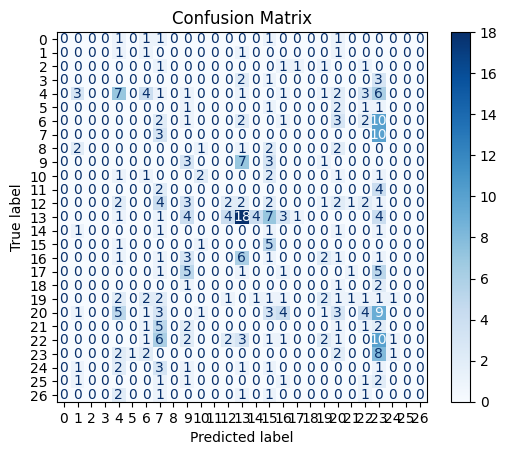

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

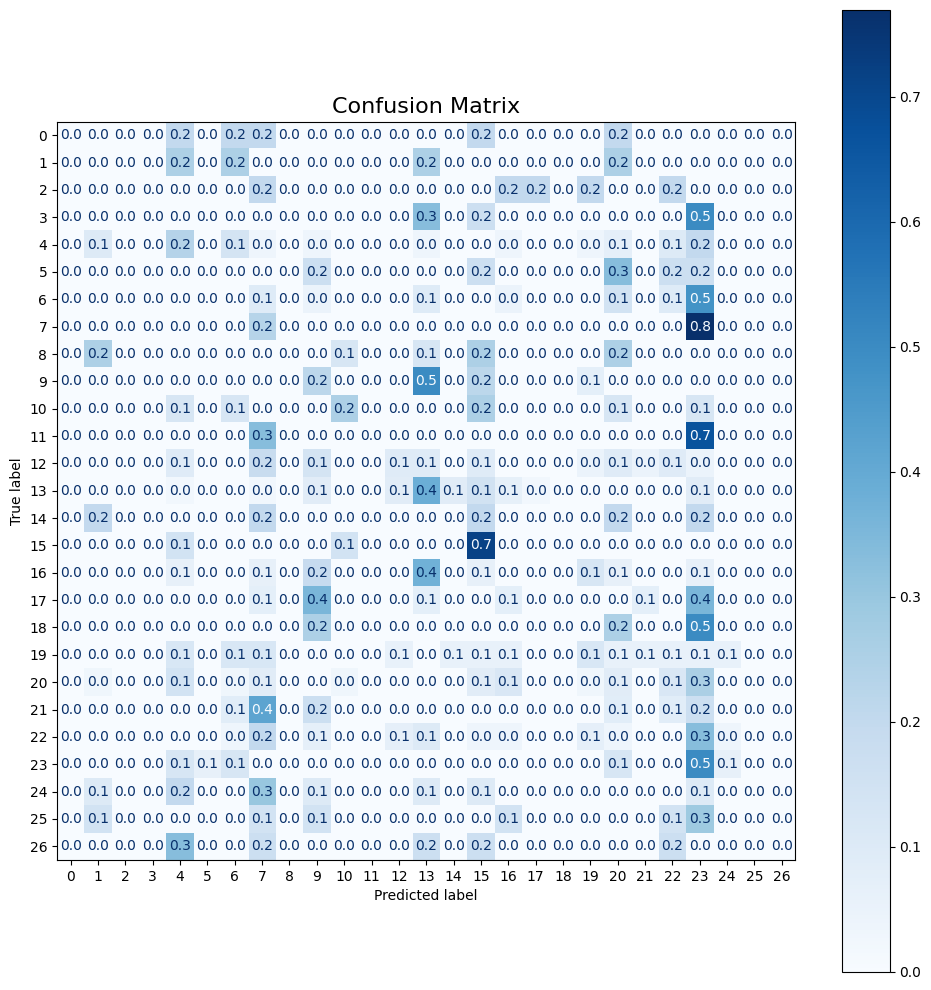

In [43]:
cm_test_normalized = cm_test.astype('float') / cm_test.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(10, 10))  # Bigger figure
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_normalized)
disp.plot(cmap='Blues', ax=ax, values_format=".1f")  

plt.title('Confusion Matrix', fontsize=16)
plt.tight_layout()
plt.show()

## Final model, with random initialization from GMM for test reps

In [8]:
# df with train and val rep from dgd merged
dgd_df = pd.read_csv("random_mut_dgd_df.tsv", sep='\t')
dgd_df

,Donor_ID,L1,L2,L3,L4,L5,L6,L7,L8,L9,...,L12,L13,L14,L15,L16,L17,L18,L19,L20,Tumor_Type
0,DO1001,-0.059443,0.059307,0.006666,0.059429,0.059121,0.058519,-0.059345,-0.003948,0.007083,...,0.059071,0.059254,0.004150,0.058520,0.059228,0.059144,-0.059394,-0.059441,0.023936,Breast-AdenoCa
1,DO1002,-0.059278,0.059376,0.005732,0.059457,0.058883,0.058640,-0.059390,-0.001226,0.008013,...,0.059329,0.059506,0.004231,0.058660,0.059290,0.059500,-0.059202,-0.059336,0.023722,Breast-AdenoCa
2,DO1003,-0.059399,0.059325,0.005918,0.059423,0.059162,0.058813,-0.059365,-0.002800,0.007055,...,0.059018,0.059312,0.004882,0.058718,0.059262,0.059218,-0.059355,-0.059385,0.023785,Breast-AdenoCa
3,DO1004,-0.059329,0.059373,0.005090,0.059525,0.058951,0.058634,-0.059371,-0.002795,0.008695,...,0.059018,0.059449,0.002948,0.058426,0.059283,0.059105,-0.059267,-0.059342,0.024158,Breast-AdenoCa
4,DO1005,-0.059376,0.059283,0.009196,0.059449,0.059176,0.058615,-0.059317,0.000309,0.005873,...,0.059073,0.059291,0.005836,0.058725,0.059211,0.059272,-0.059335,-0.059536,0.024358,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,DO9106,-0.058371,0.059222,0.003610,0.058098,0.058313,0.058652,-0.058431,0.002285,0.002053,...,0.058992,0.057910,-0.000418,0.059636,0.058043,0.057869,-0.060735,-0.060769,0.023476,ColoRect-AdenoCA
2114,DO9700,-0.059425,0.059304,0.002679,0.059467,0.058827,0.058092,-0.059395,-0.001892,0.004280,...,0.059207,0.059096,0.000257,0.058179,0.059144,0.058907,-0.059401,-0.059231,0.023943,ColoRect-AdenoCA
2115,DO9732,-0.059494,0.059450,0.003254,0.059719,0.059353,0.058584,-0.059182,-0.001831,0.005103,...,0.059139,0.058920,0.000782,0.058191,0.058976,0.058874,-0.059561,-0.059439,0.024244,ColoRect-AdenoCA
2116,DO9788,-0.059410,0.059373,0.001510,0.059395,0.058913,0.058352,-0.059315,-0.001684,0.002816,...,0.059209,0.059194,-0.000746,0.058548,0.059216,0.058898,-0.059472,-0.059370,0.024516,ColoRect-AdenoCA


In [9]:
X_train = dgd_df.iloc[:, 1:-1]
y_train = dgd_df['Tumor_Type'] 

In [10]:
X_train

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19,L20
0,-0.059443,0.059307,0.006666,0.059429,0.059121,0.058519,-0.059345,-0.003948,0.007083,0.059329,0.059281,0.059071,0.059254,0.004150,0.058520,0.059228,0.059144,-0.059394,-0.059441,0.023936
1,-0.059278,0.059376,0.005732,0.059457,0.058883,0.058640,-0.059390,-0.001226,0.008013,0.059396,0.059303,0.059329,0.059506,0.004231,0.058660,0.059290,0.059500,-0.059202,-0.059336,0.023722
2,-0.059399,0.059325,0.005918,0.059423,0.059162,0.058813,-0.059365,-0.002800,0.007055,0.059365,0.059288,0.059018,0.059312,0.004882,0.058718,0.059262,0.059218,-0.059355,-0.059385,0.023785
3,-0.059329,0.059373,0.005090,0.059525,0.058951,0.058634,-0.059371,-0.002795,0.008695,0.059389,0.059310,0.059018,0.059449,0.002948,0.058426,0.059283,0.059105,-0.059267,-0.059342,0.024158
4,-0.059376,0.059283,0.009196,0.059449,0.059176,0.058615,-0.059317,0.000309,0.005873,0.059397,0.059309,0.059073,0.059291,0.005836,0.058725,0.059211,0.059272,-0.059335,-0.059536,0.024358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,-0.058371,0.059222,0.003610,0.058098,0.058313,0.058652,-0.058431,0.002285,0.002053,0.059482,0.059323,0.058992,0.057910,-0.000418,0.059636,0.058043,0.057869,-0.060735,-0.060769,0.023476
2114,-0.059425,0.059304,0.002679,0.059467,0.058827,0.058092,-0.059395,-0.001892,0.004280,0.059361,0.059498,0.059207,0.059096,0.000257,0.058179,0.059144,0.058907,-0.059401,-0.059231,0.023943
2115,-0.059494,0.059450,0.003254,0.059719,0.059353,0.058584,-0.059182,-0.001831,0.005103,0.059421,0.059361,0.059139,0.058920,0.000782,0.058191,0.058976,0.058874,-0.059561,-0.059439,0.024244
2116,-0.059410,0.059373,0.001510,0.059395,0.058913,0.058352,-0.059315,-0.001684,0.002816,0.059397,0.059421,0.059209,0.059194,-0.000746,0.058548,0.059216,0.058898,-0.059472,-0.059370,0.024516


In [11]:
# test rep df
dgd_test_df = pd.read_csv("random_mut_dgd_test_df.tsv", sep='\t')
dgd_test_df

,Donor_ID,L1,L2,L3,L4,L5,L6,L7,L8,L9,...,L12,L13,L14,L15,L16,L17,L18,L19,L20,Tumor_Type
0,DO51074,-0.001797,0.000524,0.006726,0.001734,0.001666,0.002515,0.002324,-0.002264,0.001924,...,-0.000434,-0.002077,0.000293,0.000479,0.000270,0.002590,-0.001866,-0.002986,0.002114,Prost-AdenoCA
1,DO51496,0.003944,-0.001180,-0.003710,-0.004539,-0.000401,0.001461,-0.001682,0.005394,-0.004891,...,0.003922,0.003619,-0.000938,-0.002207,-0.001766,-0.000588,0.002153,0.000250,0.001156,Panc-AdenoCA
2,DO15046,0.001695,-0.000921,-0.001295,-0.000387,-0.001116,0.000084,0.001929,0.012258,0.005104,...,-0.000603,-0.001389,0.025366,-0.000680,-0.002518,0.000692,0.000925,-0.000385,-0.001331,Head-SCC
3,DO6558,-0.000266,0.001360,-0.012873,-0.001331,0.002481,0.003578,-0.002617,-0.008333,-0.009025,...,-0.000991,-0.002406,-0.015721,-0.000923,-0.000300,0.000928,-0.002506,-0.002733,0.002332,Lymph-CLL
4,DO50410,-0.002015,0.003347,-0.023625,0.001264,-0.003228,0.000638,-0.003932,0.001378,0.004738,...,-0.005179,-0.000518,0.020572,-0.004519,0.001696,0.001755,-0.001879,0.000161,-0.000716,Eso-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,DO46400,-0.002803,-0.001797,0.013233,0.000770,-0.000471,0.001129,0.003533,-0.001257,0.003772,...,-0.002122,-0.000902,0.011117,0.001537,0.000290,-0.000448,0.000734,-0.002381,-0.001562,Ovary-AdenoCA
370,DO51514,0.000792,0.001188,0.006335,0.000011,0.000999,0.005976,0.002190,-0.000192,-0.003064,...,0.003568,-0.001437,-0.007683,0.005326,-0.004089,0.002223,-0.001508,-0.002069,-0.000250,Panc-AdenoCA
371,DO51144,0.001967,0.000560,0.006382,-0.002428,0.001740,0.003355,0.000305,-0.002252,-0.001310,...,0.004968,-0.001356,-0.001302,0.002625,-0.001523,0.001593,-0.000107,-0.001497,-0.000212,Prost-AdenoCA
372,DO23551,0.000594,-0.001547,-0.003128,-0.002271,-0.000529,0.000693,-0.002688,0.008253,0.013130,...,-0.001139,-0.003585,0.010320,-0.000796,-0.000938,-0.002931,-0.002082,0.001362,-0.001132,Liver-HCC


In [12]:
X_test = dgd_test_df.iloc[:, 1:-1]
y_test = dgd_test_df['Tumor_Type'] 

In [13]:
X_test

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,L12,L13,L14,L15,L16,L17,L18,L19,L20
0,-0.001797,0.000524,0.006726,0.001734,0.001666,0.002515,0.002324,-0.002264,0.001924,0.002090,0.001604,-0.000434,-0.002077,0.000293,0.000479,0.000270,0.002590,-0.001866,-0.002986,0.002114
1,0.003944,-0.001180,-0.003710,-0.004539,-0.000401,0.001461,-0.001682,0.005394,-0.004891,0.001068,0.000531,0.003922,0.003619,-0.000938,-0.002207,-0.001766,-0.000588,0.002153,0.000250,0.001156
2,0.001695,-0.000921,-0.001295,-0.000387,-0.001116,0.000084,0.001929,0.012258,0.005104,-0.000202,-0.000125,-0.000603,-0.001389,0.025366,-0.000680,-0.002518,0.000692,0.000925,-0.000385,-0.001331
3,-0.000266,0.001360,-0.012873,-0.001331,0.002481,0.003578,-0.002617,-0.008333,-0.009025,0.000482,-0.001221,-0.000991,-0.002406,-0.015721,-0.000923,-0.000300,0.000928,-0.002506,-0.002733,0.002332
4,-0.002015,0.003347,-0.023625,0.001264,-0.003228,0.000638,-0.003932,0.001378,0.004738,-0.004162,-0.000486,-0.005179,-0.000518,0.020572,-0.004519,0.001696,0.001755,-0.001879,0.000161,-0.000716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,-0.002803,-0.001797,0.013233,0.000770,-0.000471,0.001129,0.003533,-0.001257,0.003772,-0.000393,0.002002,-0.002122,-0.000902,0.011117,0.001537,0.000290,-0.000448,0.000734,-0.002381,-0.001562
370,0.000792,0.001188,0.006335,0.000011,0.000999,0.005976,0.002190,-0.000192,-0.003064,0.003404,0.002168,0.003568,-0.001437,-0.007683,0.005326,-0.004089,0.002223,-0.001508,-0.002069,-0.000250
371,0.001967,0.000560,0.006382,-0.002428,0.001740,0.003355,0.000305,-0.002252,-0.001310,0.002557,-0.000338,0.004968,-0.001356,-0.001302,0.002625,-0.001523,0.001593,-0.000107,-0.001497,-0.000212
372,0.000594,-0.001547,-0.003128,-0.002271,-0.000529,0.000693,-0.002688,0.008253,0.013130,0.000070,-0.001350,-0.001139,-0.003585,0.010320,-0.000796,-0.000938,-0.002931,-0.002082,0.001362,-0.001132


In [14]:
y_test

0      Prost-AdenoCA
1       Panc-AdenoCA
2           Head-SCC
3          Lymph-CLL
4        Eso-AdenoCa
           ...      
369    Ovary-AdenoCA
370     Panc-AdenoCA
371    Prost-AdenoCA
372        Liver-HCC
373    Ovary-AdenoCA
Name: Tumor_Type, Length: 374, dtype: object

In [15]:
# knn
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [16]:
# the prediction accuracy
sum(predictions == y_test)/len(y_test)

0.17914438502673796

In [17]:
sklearn_adjusted_rand_score = adjusted_rand_score(predictions, y_test) # Calculate Adjusted Rand Score
sklearn_adjusted_rand_score

0.06310435453705375

In [18]:
# heatmap of class accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test, predictions)

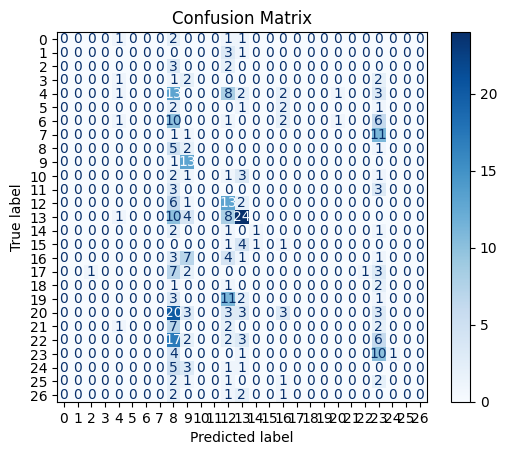

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

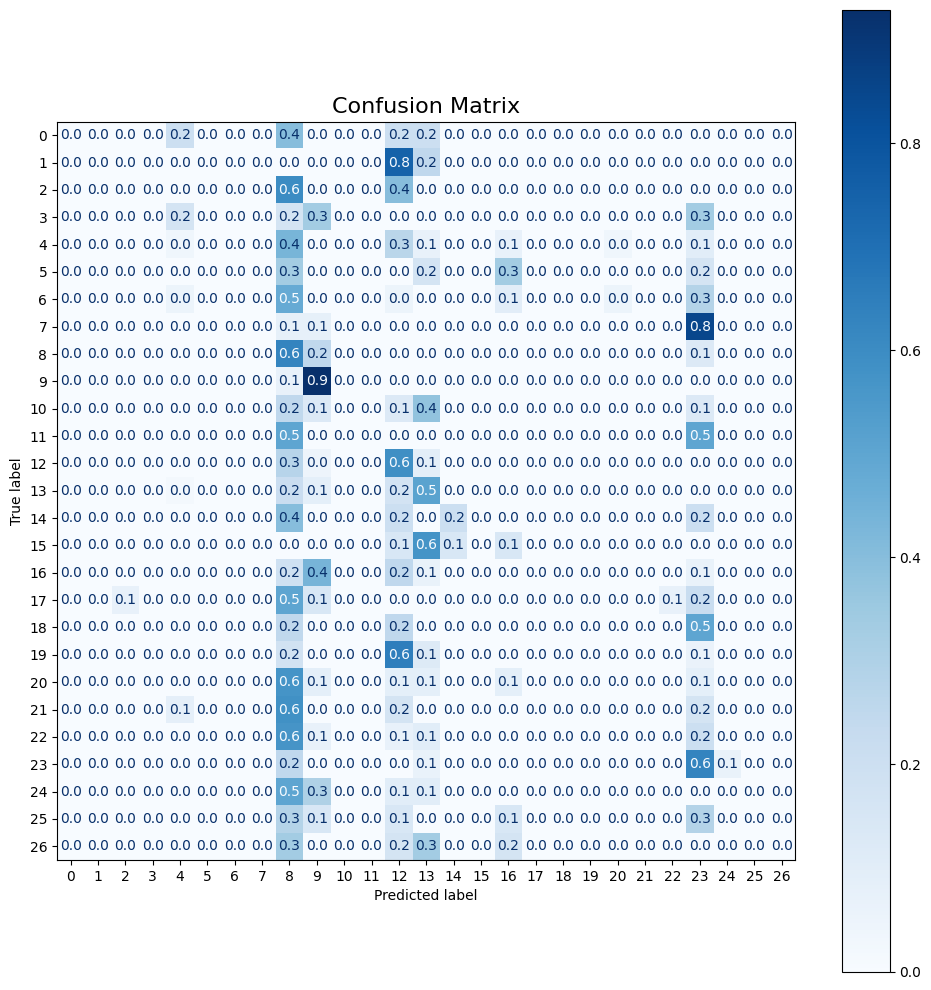

In [23]:
cm_test_normalized = cm_test.astype('float') / cm_test.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(10, 10))  # Bigger figure
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_normalized)
disp.plot(cmap='Blues', ax=ax, values_format=".1f")  

plt.title('Confusion Matrix', fontsize=16)
plt.tight_layout()
plt.show()

## Normalized counts

In [121]:
# df with train and val rep from dgd merged, Unnamed is the original index
df = pd.read_parquet("normalized.parquet")
df

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1001,0.002122,0.001061,0.000884,0.001945,0.001238,0.000707,0.000354,0.001061,0.000354,0.000000,...,0.000354,0.001238,0.000707,0.000884,0.001238,0.002122,0.000884,0.000531,0.002299,Breast-AdenoCa
DO1002,0.003684,0.000737,0.001105,0.000921,0.002026,0.001658,0.000000,0.000737,0.000553,0.000368,...,0.000553,0.000737,0.000000,0.001105,0.001105,0.001105,0.000184,0.000368,0.001289,Breast-AdenoCa
DO1003,0.002779,0.000855,0.001496,0.001283,0.000641,0.001283,0.000000,0.001924,0.000428,0.000000,...,0.000428,0.001283,0.000641,0.000214,0.001283,0.001069,0.000641,0.000641,0.001710,Breast-AdenoCa
DO1004,0.003077,0.000995,0.001719,0.002172,0.002986,0.001176,0.000271,0.001810,0.000181,0.000090,...,0.000995,0.000814,0.000633,0.000905,0.001086,0.000452,0.000633,0.000543,0.001538,Breast-AdenoCa
DO1005,0.001401,0.000778,0.000778,0.001090,0.001401,0.001557,0.000467,0.001401,0.000000,0.000000,...,0.000467,0.000467,0.000467,0.000311,0.000467,0.000778,0.000623,0.000311,0.000623,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9700,0.002921,0.000802,0.002291,0.002462,0.002692,0.000974,0.000115,0.001661,0.000229,0.000000,...,0.000229,0.001088,0.000401,0.000802,0.000744,0.002692,0.001546,0.000744,0.004581,ColoRect-AdenoCA
DO9732,0.004553,0.001258,0.001438,0.002816,0.002336,0.001677,0.000000,0.001318,0.000300,0.000180,...,0.000300,0.000539,0.000359,0.000839,0.000899,0.001018,0.001618,0.000719,0.002876,ColoRect-AdenoCA
DO9788,0.004425,0.000750,0.001875,0.001950,0.001950,0.001200,0.000150,0.001500,0.000525,0.000150,...,0.000300,0.001050,0.000450,0.000525,0.000975,0.002925,0.002025,0.001350,0.004875,ColoRect-AdenoCA


In [122]:
train_data, val_test_data = train_test_split(df, test_size=0.3, random_state=seed, stratify=df['Tumor_Type'])

In [123]:
train_data

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO50420,0.004566,0.001740,0.001522,0.002174,0.003044,0.000870,0.000435,0.002174,0.000435,0.000000,...,0.000435,0.000435,0.000000,0.000435,0.000435,0.000652,0.000870,0.000652,0.002609,Prost-AdenoCA
DO52701,0.002513,0.000942,0.001256,0.001884,0.001570,0.001570,0.000000,0.001570,0.000000,0.000000,...,0.001256,0.000628,0.000000,0.000314,0.001570,0.003141,0.002827,0.000628,0.008480,Lymph-CLL
DO51500,0.004192,0.000729,0.000911,0.001640,0.003098,0.001276,0.000182,0.000182,0.000182,0.000000,...,0.000547,0.000364,0.000000,0.000729,0.000182,0.001640,0.001276,0.000364,0.002551,Panc-AdenoCA
DO10829,0.002342,0.002342,0.002342,0.000781,0.003903,0.000781,0.000000,0.001561,0.000000,0.000781,...,0.000000,0.000000,0.000000,0.000781,0.000781,0.000000,0.000781,0.000000,0.002342,Prost-AdenoCA
DO51069,0.003946,0.001184,0.001579,0.001973,0.001579,0.001973,0.000000,0.000395,0.000000,0.000000,...,0.000789,0.000395,0.000000,0.000000,0.000789,0.000789,0.000395,0.000000,0.002368,Prost-AdenoCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO45239,0.003754,0.001976,0.001581,0.001778,0.002964,0.000988,0.000000,0.000988,0.000395,0.000395,...,0.000198,0.000593,0.000198,0.000000,0.000790,0.000593,0.000790,0.000395,0.001976,Liver-HCC
DO6474,0.003324,0.001995,0.002660,0.000665,0.000000,0.000000,0.000000,0.001995,0.000665,0.000000,...,0.000000,0.000000,0.000000,0.001330,0.001330,0.000000,0.000000,0.000665,0.001995,Lymph-CLL
DO48952,0.001104,0.000000,0.000000,0.002208,0.000000,0.001104,0.001104,0.001104,0.000000,0.000000,...,0.000000,0.003311,0.001104,0.000000,0.001104,0.000000,0.000000,0.001104,0.002208,CNS-Medullo


In [124]:
validation_data, test_data = train_test_split(val_test_data, test_size=0.5, random_state=seed, stratify=val_test_data['Tumor_Type'])

In [125]:
# both train and val set make up the final train set, so as to match the DGD approach
concat = pd.concat([train_data, validation_data], axis=0)
concat

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO50420,0.004566,0.001740,0.001522,0.002174,0.003044,0.000870,0.000435,0.002174,0.000435,0.000000,...,0.000435,0.000435,0.000000,0.000435,0.000435,0.000652,0.000870,0.000652,0.002609,Prost-AdenoCA
DO52701,0.002513,0.000942,0.001256,0.001884,0.001570,0.001570,0.000000,0.001570,0.000000,0.000000,...,0.001256,0.000628,0.000000,0.000314,0.001570,0.003141,0.002827,0.000628,0.008480,Lymph-CLL
DO51500,0.004192,0.000729,0.000911,0.001640,0.003098,0.001276,0.000182,0.000182,0.000182,0.000000,...,0.000547,0.000364,0.000000,0.000729,0.000182,0.001640,0.001276,0.000364,0.002551,Panc-AdenoCA
DO10829,0.002342,0.002342,0.002342,0.000781,0.003903,0.000781,0.000000,0.001561,0.000000,0.000781,...,0.000000,0.000000,0.000000,0.000781,0.000781,0.000000,0.000781,0.000000,0.002342,Prost-AdenoCA
DO51069,0.003946,0.001184,0.001579,0.001973,0.001579,0.001973,0.000000,0.000395,0.000000,0.000000,...,0.000789,0.000395,0.000000,0.000000,0.000789,0.000789,0.000395,0.000000,0.002368,Prost-AdenoCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO46328,0.002586,0.000185,0.001293,0.001293,0.002402,0.000924,0.000369,0.001293,0.000000,0.000000,...,0.000554,0.000554,0.000369,0.000554,0.000554,0.000739,0.000924,0.000924,0.003141,Ovary-AdenoCA
DO23028,0.003459,0.001456,0.002367,0.001729,0.002367,0.001274,0.000273,0.002913,0.000364,0.000546,...,0.000546,0.000273,0.000273,0.000364,0.000182,0.000637,0.000637,0.000637,0.001274,Liver-HCC
DO48925,0.003044,0.000000,0.000000,0.003044,0.001522,0.001522,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001522,0.000000,0.000000,0.001522,0.000000,0.000000,0.000000,0.001522,CNS-Medullo


In [126]:
merged_df = concat.sort_index(axis=0)
merged_df

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1001,0.002122,0.001061,0.000884,0.001945,0.001238,0.000707,0.000354,0.001061,0.000354,0.000000,...,0.000354,0.001238,0.000707,0.000884,0.001238,0.002122,0.000884,0.000531,0.002299,Breast-AdenoCa
DO1002,0.003684,0.000737,0.001105,0.000921,0.002026,0.001658,0.000000,0.000737,0.000553,0.000368,...,0.000553,0.000737,0.000000,0.001105,0.001105,0.001105,0.000184,0.000368,0.001289,Breast-AdenoCa
DO1003,0.002779,0.000855,0.001496,0.001283,0.000641,0.001283,0.000000,0.001924,0.000428,0.000000,...,0.000428,0.001283,0.000641,0.000214,0.001283,0.001069,0.000641,0.000641,0.001710,Breast-AdenoCa
DO1004,0.003077,0.000995,0.001719,0.002172,0.002986,0.001176,0.000271,0.001810,0.000181,0.000090,...,0.000995,0.000814,0.000633,0.000905,0.001086,0.000452,0.000633,0.000543,0.001538,Breast-AdenoCa
DO1005,0.001401,0.000778,0.000778,0.001090,0.001401,0.001557,0.000467,0.001401,0.000000,0.000000,...,0.000467,0.000467,0.000467,0.000311,0.000467,0.000778,0.000623,0.000311,0.000623,Breast-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9106,0.005267,0.001277,0.001596,0.002713,0.003351,0.000958,0.000000,0.001277,0.000160,0.000000,...,0.000479,0.000000,0.000160,0.000958,0.000000,0.000479,0.000479,0.000479,0.001756,ColoRect-AdenoCA
DO9700,0.002921,0.000802,0.002291,0.002462,0.002692,0.000974,0.000115,0.001661,0.000229,0.000000,...,0.000229,0.001088,0.000401,0.000802,0.000744,0.002692,0.001546,0.000744,0.004581,ColoRect-AdenoCA
DO9732,0.004553,0.001258,0.001438,0.002816,0.002336,0.001677,0.000000,0.001318,0.000300,0.000180,...,0.000300,0.000539,0.000359,0.000839,0.000899,0.001018,0.001618,0.000719,0.002876,ColoRect-AdenoCA


In [127]:
X_train = merged_df.iloc[:, 1:-1]
y_train = merged_df['Tumor_Type'] 

In [128]:
X_train

,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,AA[C>A]GG,...,TT[T>G]CG,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO1001,0.001061,0.000884,0.001945,0.001238,0.000707,0.000354,0.001061,0.000354,0.000000,0.000177,...,0.000000,0.000354,0.001238,0.000707,0.000884,0.001238,0.002122,0.000884,0.000531,0.002299
DO1002,0.000737,0.001105,0.000921,0.002026,0.001658,0.000000,0.000737,0.000553,0.000368,0.000184,...,0.000000,0.000553,0.000737,0.000000,0.001105,0.001105,0.001105,0.000184,0.000368,0.001289
DO1003,0.000855,0.001496,0.001283,0.000641,0.001283,0.000000,0.001924,0.000428,0.000000,0.000000,...,0.000000,0.000428,0.001283,0.000641,0.000214,0.001283,0.001069,0.000641,0.000641,0.001710
DO1004,0.000995,0.001719,0.002172,0.002986,0.001176,0.000271,0.001810,0.000181,0.000090,0.000090,...,0.000000,0.000995,0.000814,0.000633,0.000905,0.001086,0.000452,0.000633,0.000543,0.001538
DO1005,0.000778,0.000778,0.001090,0.001401,0.001557,0.000467,0.001401,0.000000,0.000000,0.000000,...,0.000000,0.000467,0.000467,0.000467,0.000311,0.000467,0.000778,0.000623,0.000311,0.000623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO9106,0.001277,0.001596,0.002713,0.003351,0.000958,0.000000,0.001277,0.000160,0.000000,0.000160,...,0.000160,0.000479,0.000000,0.000160,0.000958,0.000000,0.000479,0.000479,0.000479,0.001756
DO9700,0.000802,0.002291,0.002462,0.002692,0.000974,0.000115,0.001661,0.000229,0.000000,0.000229,...,0.000115,0.000229,0.001088,0.000401,0.000802,0.000744,0.002692,0.001546,0.000744,0.004581
DO9732,0.001258,0.001438,0.002816,0.002336,0.001677,0.000000,0.001318,0.000300,0.000180,0.000120,...,0.000060,0.000300,0.000539,0.000359,0.000839,0.000899,0.001018,0.001618,0.000719,0.002876


In [129]:
# test df
test_data

,AA[C>A]AA,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,...,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT,Tumor_Type
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO51074,0.004843,0.001038,0.001384,0.001730,0.002767,0.002075,0.000000,0.001730,0.000000,0.000000,...,0.001038,0.000000,0.000346,0.000692,0.000000,0.000000,0.000692,0.000000,0.002767,Prost-AdenoCA
DO51496,0.002721,0.000583,0.001555,0.002138,0.002138,0.000972,0.000000,0.001361,0.000194,0.000194,...,0.000389,0.000389,0.000000,0.000194,0.000194,0.000389,0.000389,0.000389,0.001749,Panc-AdenoCA
DO15046,0.002660,0.001248,0.002135,0.002463,0.001609,0.001084,0.000230,0.001347,0.000230,0.000164,...,0.000263,0.000328,0.000460,0.000230,0.000263,0.000427,0.000657,0.000361,0.002102,Head-SCC
DO6558,0.004627,0.001322,0.000000,0.001983,0.001322,0.000000,0.000661,0.000000,0.001322,0.000000,...,0.000000,0.000000,0.000661,0.000000,0.000661,0.000000,0.000000,0.000661,0.001983,Lymph-CLL
DO50410,0.002769,0.000577,0.002192,0.001558,0.002192,0.001269,0.000058,0.001269,0.000231,0.000058,...,0.000404,0.000923,0.000173,0.000462,0.000404,0.009866,0.005308,0.004500,0.008250,Eso-AdenoCa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO46400,0.003161,0.001355,0.001580,0.001430,0.002333,0.001129,0.000301,0.002408,0.000301,0.000151,...,0.000151,0.000753,0.000452,0.000978,0.000452,0.000527,0.000151,0.000602,0.001355,Ovary-AdenoCA
DO51514,0.001811,0.001114,0.001532,0.001393,0.000975,0.001393,0.000000,0.000975,0.000139,0.000000,...,0.000000,0.000418,0.000000,0.001114,0.000557,0.001253,0.000836,0.001114,0.003482,Panc-AdenoCA
DO51144,0.004851,0.000606,0.001819,0.000910,0.003032,0.001213,0.000000,0.002426,0.000000,0.000000,...,0.000000,0.000606,0.000000,0.000000,0.000000,0.000606,0.000910,0.000303,0.003032,Prost-AdenoCA


In [130]:
X_test = test_data.iloc[:, 1:-1]
y_test = test_data['Tumor_Type'] 

In [131]:
X_test

,AA[C>A]AC,AA[C>A]AG,AA[C>A]AT,AA[C>A]CA,AA[C>A]CC,AA[C>A]CG,AA[C>A]CT,AA[C>A]GA,AA[C>A]GC,AA[C>A]GG,...,TT[T>G]CG,TT[T>G]CT,TT[T>G]GA,TT[T>G]GC,TT[T>G]GG,TT[T>G]GT,TT[T>G]TA,TT[T>G]TC,TT[T>G]TG,TT[T>G]TT
Donor_ID,,,,,,,,,,,,,,,,,,,,,
DO51074,0.001038,0.001384,0.001730,0.002767,0.002075,0.000000,0.001730,0.000000,0.000000,0.000692,...,0.000000,0.001038,0.000000,0.000346,0.000692,0.000000,0.000000,0.000692,0.000000,0.002767
DO51496,0.000583,0.001555,0.002138,0.002138,0.000972,0.000000,0.001361,0.000194,0.000194,0.000000,...,0.000000,0.000389,0.000389,0.000000,0.000194,0.000194,0.000389,0.000389,0.000389,0.001749
DO15046,0.001248,0.002135,0.002463,0.001609,0.001084,0.000230,0.001347,0.000230,0.000164,0.000328,...,0.000066,0.000263,0.000328,0.000460,0.000230,0.000263,0.000427,0.000657,0.000361,0.002102
DO6558,0.001322,0.000000,0.001983,0.001322,0.000000,0.000661,0.000000,0.001322,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000661,0.000000,0.000661,0.000000,0.000000,0.000661,0.001983
DO50410,0.000577,0.002192,0.001558,0.002192,0.001269,0.000058,0.001269,0.000231,0.000058,0.000058,...,0.000000,0.000404,0.000923,0.000173,0.000462,0.000404,0.009866,0.005308,0.004500,0.008250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DO46400,0.001355,0.001580,0.001430,0.002333,0.001129,0.000301,0.002408,0.000301,0.000151,0.000151,...,0.000151,0.000151,0.000753,0.000452,0.000978,0.000452,0.000527,0.000151,0.000602,0.001355
DO51514,0.001114,0.001532,0.001393,0.000975,0.001393,0.000000,0.000975,0.000139,0.000000,0.000139,...,0.000000,0.000000,0.000418,0.000000,0.001114,0.000557,0.001253,0.000836,0.001114,0.003482
DO51144,0.000606,0.001819,0.000910,0.003032,0.001213,0.000000,0.002426,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000606,0.000000,0.000000,0.000000,0.000606,0.000910,0.000303,0.003032


In [132]:
y_test

Donor_ID
DO51074    Prost-AdenoCA
DO51496     Panc-AdenoCA
DO15046         Head-SCC
DO6558         Lymph-CLL
DO50410      Eso-AdenoCa
               ...      
DO46400    Ovary-AdenoCA
DO51514     Panc-AdenoCA
DO51144    Prost-AdenoCA
DO23551        Liver-HCC
DO31420    Ovary-AdenoCA
Name: Tumor_Type, Length: 374, dtype: object

In [133]:
# knn
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [134]:
# the prediction accuracy
sum(predictions == y_test)/len(y_test)

0.4385026737967914

In [135]:
sklearn_adjusted_rand_score = adjusted_rand_score(predictions, y_test) # Calculate Adjusted Rand Score
sklearn_adjusted_rand_score

0.30216245426063176

In [136]:
labels = np.unique(y_test)
labels

array(['Biliary-AdenoCA', 'Bladder-TCC', 'Bone-Leiomyo', 'Bone-Osteosarc',
       'Breast-AdenoCa', 'CNS-GBM', 'CNS-Medullo', 'CNS-PiloAstro',
       'ColoRect-AdenoCA', 'Eso-AdenoCa', 'Head-SCC', 'Kidney-ChRCC',
       'Kidney-RCC', 'Liver-HCC', 'Lung-AdenoCA', 'Lung-SCC',
       'Lymph-BNHL', 'Lymph-CLL', 'Myeloid-MPN', 'Ovary-AdenoCA',
       'Panc-AdenoCA', 'Panc-Endocrine', 'Prost-AdenoCA', 'Skin-Melanoma',
       'Stomach-AdenoCA', 'Thy-AdenoCA', 'Uterus-AdenoCA'], dtype=object)

In [137]:
# heatmap of class accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(y_test, predictions, labels=labels)

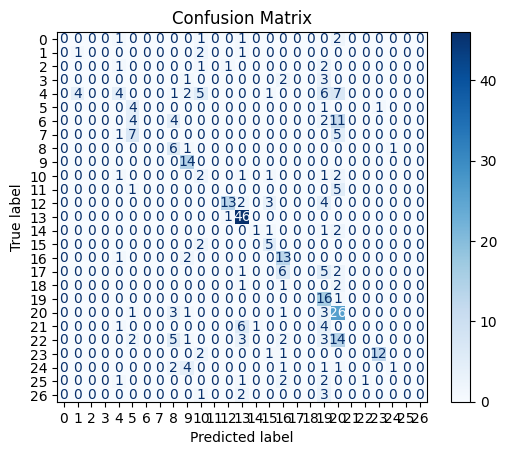

In [138]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

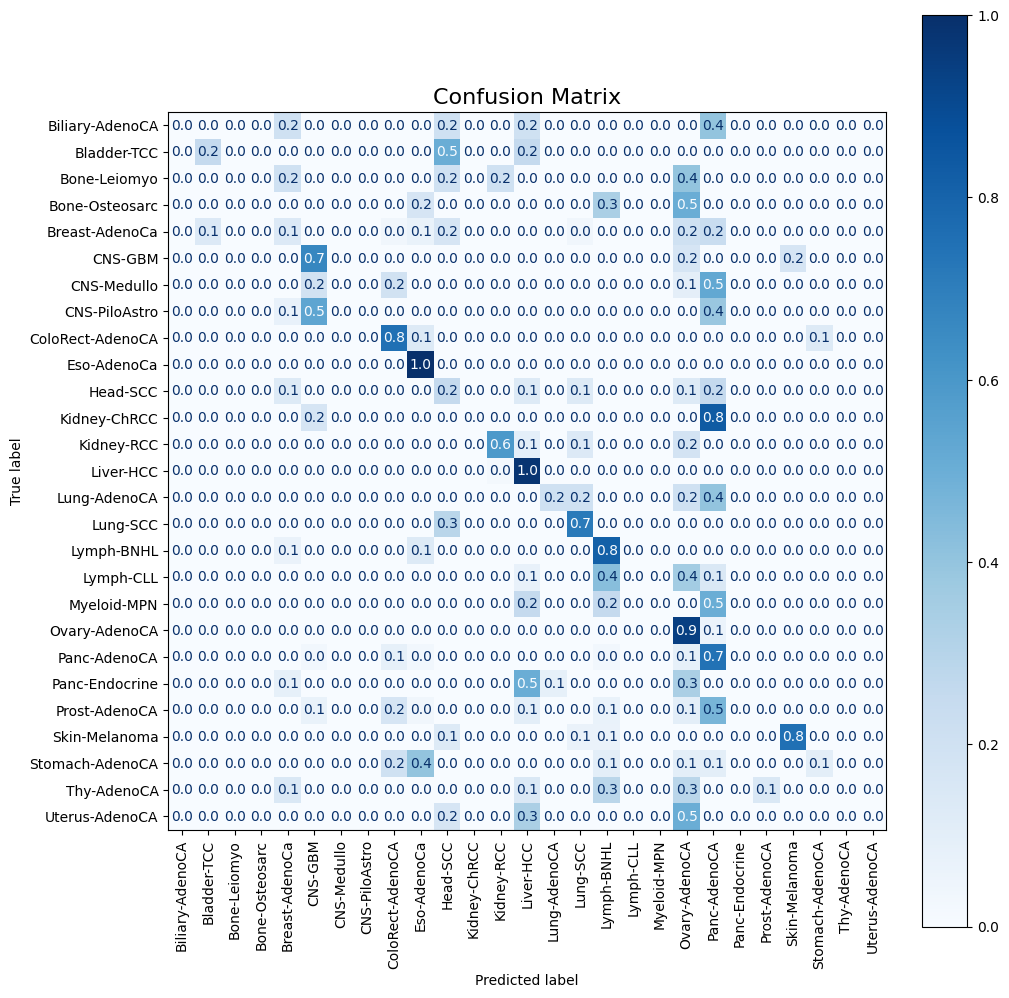

In [139]:
cm_test_normalized = cm_test.astype('float') / cm_test.sum(axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_normalized, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, values_format=".1f", xticks_rotation=90)

plt.title('Confusion Matrix', fontsize=16)

plt.savefig(f"NormCounts_CM.pdf", bbox_inches='tight')

plt.show()

In [140]:
#performance table
perf_df = pd.DataFrame({
    "Mutational signatures": [0.79, 0.67],
    "PCs of mutational signatures": [0.53, 0.40],
    "Normalized counts": [0.44, 0.30],
    "PCs of normalized counts": [0.56, 0.40],
    "Standard DGD": [0.64, 0.52],
    "Factor DGD without one-hot": [0.29, 0.14],
    "Factor DGD with one-hot": [0.22, 0.14],
}, index=["Accuracy", "ARI"])


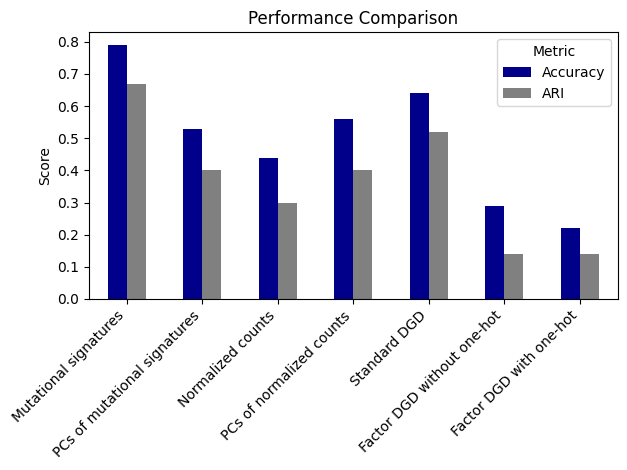

In [141]:
custom_colors = ['darkblue', 'grey'] 

# Transpose so that methods are on the x-axis
perf_df.T.plot(kind='bar', color=custom_colors)

# Add labels
plt.ylabel("Score")
plt.title("Performance Comparison")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metric")
plt.tight_layout()

plt.savefig(f"Performance.pdf", bbox_inches='tight')

plt.show()